In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('.')
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

import incense
from incense import ExperimentLoader

In [3]:
def print_imm(imgs,name):
    n = 20  # how many digits we will display
    plt.figure(figsize=(2,0.5))
    plt.text(0.1, 0.1, name, fontsize=12) 
    plt.show()
    plt.figure(figsize=(40, 2 * len(imgs) + 2))
    for i in range(n):
        for j in range(len(imgs)):
            # display original
            ax = plt.subplot(len(imgs), n, i + 1 + j * n)
            plt.imshow(imgs[j][i].reshape(28, 28))
            
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)

    plt.show()

## Finding experiments

To use `incense` we first have to instantiate an experiment loader that will enable us to query the database for specific runs.

In [4]:
loader = ExperimentLoader(
    mongo_uri="mongodb://localhost:27017", 
    db_name='sacred'
)

In [5]:
experiments=loader.find_by_config_key('epochs', 250)

In [6]:
experiments

QuerySet([Experiment(id=1, name=autoencoder_test), Experiment(id=2, name=autoencoder_test), Experiment(id=3, name=autoencoder_test), Experiment(id=4, name=autoencoder_test), Experiment(id=5, name=autoencoder_test), Experiment(id=6, name=autoencoder_test), Experiment(id=7, name=autoencoder_test), Experiment(id=8, name=autoencoder_test), Experiment(id=9, name=autoencoder_test), Experiment(id=10, name=autoencoder_test), Experiment(id=11, name=autoencoder_test), Experiment(id=12, name=autoencoder_test), Experiment(id=13, name=autoencoder_test), Experiment(id=14, name=autoencoder_test), Experiment(id=15, name=autoencoder_test), Experiment(id=16, name=autoencoder_test), Experiment(id=17, name=autoencoder_test), Experiment(id=18, name=autoencoder_test), Experiment(id=19, name=autoencoder_test), Experiment(id=20, name=autoencoder_test), Experiment(id=21, name=autoencoder_test), Experiment(id=22, name=autoencoder_test), Experiment(id=23, name=autoencoder_test), Experiment(id=24, name=autoencode

In [7]:
exp=experiments[0]

In [8]:
exp.artifacts

{'history_autoencoder': Artifact(name=history_autoencoder),
 'autoencoder.hdf5': Artifact(name=autoencoder.hdf5),
 'history_feature_classifier': Artifact(name=history_feature_classifier),
 'history_in_classifier': Artifact(name=history_in_classifier),
 'history_out_classifier': Artifact(name=history_out_classifier),
 'predictions_df_0': Artifact(name=predictions_df_0),
 'predictions_df_10': Artifact(name=predictions_df_10),
 'predictions_df_20': Artifact(name=predictions_df_20),
 'predictions_df_30': Artifact(name=predictions_df_30),
 'predictions_df_40': Artifact(name=predictions_df_40),
 'predictions_df_50': Artifact(name=predictions_df_50),
 'predictions_df_60': Artifact(name=predictions_df_60),
 'predictions_df_70': Artifact(name=predictions_df_70),
 'predictions_df_80': Artifact(name=predictions_df_80),
 'predictions_df_90': Artifact(name=predictions_df_90),
 'predictions_df_100': Artifact(name=predictions_df_100)}

In [9]:
exp.metrics.keys()

dict_keys(['loss_autoencoder', 'accuracy_autoencoder', 'mean_absolute_error_autoencoder', 'val_loss_autoencoder', 'val_accuracy_autoencoder', 'val_mean_absolute_error_autoencoder', 'loss_feature_classifier', 'accuracy_feature_classifier', 'val_loss_feature_classifier', 'val_accuracy_feature_classifier', 'loss_in_classifier', 'accuracy_in_classifier', 'val_loss_in_classifier', 'val_accuracy_in_classifier', 'loss_out_classifier', 'accuracy_out_classifier', 'val_loss_out_classifier', 'val_accuracy_out_classifier'])

In [10]:
exp.config

pmap({'batch_size': 256, 'iteration': False, 'autoencoder_type': 'Over_dim', 'targets_type': '10_Targets', 'epochs': 250, 'seed': 677719408})

In [25]:
pickle_artifact = exp.artifacts['predictions_df_0'].as_type(incense.artifact.PickleArtifact)
predictions_0=pd.read_pickle(pickle_artifact.file,compression='gzip')
predictions_0

predictions  \
0  [[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1...   
1  [[-0.99999017, -0.9999999, -0.999998, -0.99999...   
2  [[-0.9999884, -0.9999998, -0.99999756, -0.9999...   
3  [[-0.9999883, -0.9999998, -0.99999756, -0.9999...   
4  [[-0.9999883, -0.9999998, -0.99999756, -0.9999...   
5  [[-0.9999883, -0.9999998, -0.99999756, -0.9999...   
6  [[-0.9999883, -0.9999998, -0.99999756, -0.9999...   
7  [[-0.9999883, -0.9999998, -0.99999756, -0.9999...   

                     evaluations_autoencoder  \
0   [0.4058457747936249, 0.0029, 0.26617602]   
1    [0.408316424369812, 0.0031, 0.26670018]   
2    [0.4085360718250275, 0.0031, 0.2667517]   
3   [0.4085467866897583, 0.0031, 0.26675394]   
4   [0.4085469527244568, 0.0031, 0.26675403]   
5   [0.4085469555854797, 0.0031, 0.26675403]   
6    [0.408546955871582, 0.0031, 0.26675403]   
7  [0.40854695568084715, 0.0031, 0.26675403]   

                            predicted_output_encoder  \
0  [[82.60175, -1.0, -1.0, -1.0, -0.9390564, -1.0...   
1  [[13.229826, -1.0, -1.0, -1.0, -1.0, -1.0, -1....   
2  [[12.97963, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0...   
3  [[12.969217, -1.0, -1.0, -1.0, -1.0, -1.0, -1....   
4  [[12.968792, -1.0, -1.0, -1.0, -1.0, -1.0, -1....   
5  [[12.968789, -1.0, -1.0, -1.0, -1.0, -1.0, -1....   
6  [[12.968793, -1.0, -1.0, -1.0, -1.0, -1.0, -1....   
7  [[12.968793, -1.0, -1.0, -1.0, -1.0, -1.0, -1....   

                             predicted_in_classifier  \
0  [[7.0933646e-07, 3.2776995e-10, 5.531003e-05, ...   
1  [[2.4741809e-08, 2.1306452e-08, 3.6909852e-05,...   
2  [[2.5927964e-08, 2.2342862e-08, 3.8189664e-05,...   
3  [[2.5978197e-08, 2.2384697e-08, 3.8243623e-05,...   
4  [[2.5980079e-08, 2.2386276e-08, 3.8245704e-05,...   
5  [[2.5980176e-08, 2.2386361e-08, 3.824574e-05, ...   
6  [[2.5980226e-08, 2.2386361e-08, 3.8245813e-05,...   
7  [[2.5980226e-08, 2.2386361e-08, 3.8245813e-05,...   

       evaluations_in_classifier  \
0  [0.10183852518135682, 0.9723]   
1   [0.2525330517235212, 0.9836]   
2   [0.3367157237255713, 0.9832]   
3  [0.34814623825899327, 0.9832]   
4    [0.348491639155685, 0.9832]   
5   [0.3484964971965877, 0.9832]   
6  [0.34849655841055793, 0.9832]   
7    [0.348496557552251, 0.9832]   

                        predicted_feature_classifier  \
0  [[8.662308e-10, 4.066813e-08, 5.3638434e-08, 3...   
1  [[5.7269574e-11, 9.663518e-09, 1.959434e-07, 7...   
2  [[6.1606734e-11, 1.0206979e-08, 2.0747342e-07,...   
3  [[6.178254e-11, 1.0228866e-08, 2.0794387e-07, ...   
4  [[6.178937e-11, 1.0229685e-08, 2.0796192e-07, ...   
5  [[6.1789844e-11, 1.0229762e-08, 2.0796291e-07,...   
6  [[6.1789844e-11, 1.0229762e-08, 2.0796291e-07,...   
7  [[6.1789844e-11, 1.0229762e-08, 2.0796291e-07,...   

  evaluations_feature_classifier  \
0  [0.09360391442284563, 0.9859]   
1  [0.35299409011913485, 0.9834]   
2   [0.4675741553204316, 0.9832]   
3   [0.4775798234060952, 0.9832]   
4  [0.47795043320217884, 0.9832]   
5   [0.4779536129311651, 0.9832]   
6  [0.47795365851679744, 0.9832]   
7  [0.47795365756312314, 0.9832]   

                            predicted_out_classifier  \
0  [[5.8863716e-06, 4.184108e-05, 5.2082864e-06, ...   
1  [[6.0595694e-06, 4.2660773e-05, 5.362883e-06, ...   
2  [[6.067183e-06, 4.270041e-05, 5.3691815e-06, 6...   
3  [[6.067496e-06, 4.2701995e-05, 5.3694325e-06, ...   
4  [[6.067496e-06, 4.2701995e-05, 5.3694325e-06, ...   
5  [[6.067502e-06, 4.270204e-05, 5.3694375e-06, 6...   
6  [[6.067502e-06, 4.270204e-05, 5.3694375e-06, 6...   
7  [[6.067502e-06, 4.270204e-05, 5.3694375e-06, 6...   

      evaluations_out_classifier  
0   [0.1251548552069813, 0.9849]  
1   [0.1608382424272597, 0.9834]  
2  [0.16445824739858508, 0.9832]  
3  [0.16464109201617538, 0.9832]  
4  [0.16464320323877035, 0.9832]  
5   [0.1646432322781533, 0.9832]  
6   [0.1646432343762368, 0.9832]  
7   [0.1646432346623391, 0.9832]

In [5]:
def show_classification(exp):
    print(exp.config)

    pickle_artifact = exp.artifacts['predictions_df_0'].as_type(incense.artifact.PickleArtifact)
    predictions_0=pd.read_pickle(pickle_artifact.file,compression='gzip')

    pickle_artifact = exp.artifacts['predictions_df_10'].as_type(incense.artifact.PickleArtifact)
    predictions_10=pd.read_pickle(pickle_artifact.file,compression='gzip')

    pickle_artifact = exp.artifacts['predictions_df_20'].as_type(incense.artifact.PickleArtifact)
    predictions_20=pd.read_pickle(pickle_artifact.file,compression='gzip')

    pickle_artifact = exp.artifacts['predictions_df_30'].as_type(incense.artifact.PickleArtifact)
    predictions_30=pd.read_pickle(pickle_artifact.file,compression='gzip')


    pickle_artifact = exp.artifacts['predictions_df_40'].as_type(incense.artifact.PickleArtifact)
    predictions_40=pd.read_pickle(pickle_artifact.file,compression='gzip')

    pickle_artifact = exp.artifacts['predictions_df_50'].as_type(incense.artifact.PickleArtifact)
    predictions_50=pd.read_pickle(pickle_artifact.file,compression='gzip')


    pickle_artifact = exp.artifacts['predictions_df_60'].as_type(incense.artifact.PickleArtifact)
    predictions_60=pd.read_pickle(pickle_artifact.file,compression='gzip')

    pickle_artifact = exp.artifacts['predictions_df_70'].as_type(incense.artifact.PickleArtifact)
    predictions_70=pd.read_pickle(pickle_artifact.file,compression='gzip')

    pickle_artifact = exp.artifacts['predictions_df_80'].as_type(incense.artifact.PickleArtifact)
    predictions_80=pd.read_pickle(pickle_artifact.file,compression='gzip')

    pickle_artifact = exp.artifacts['predictions_df_90'].as_type(incense.artifact.PickleArtifact)
    predictions_90=pd.read_pickle(pickle_artifact.file,compression='gzip')

    pickle_artifact = exp.artifacts['predictions_df_100'].as_type(incense.artifact.PickleArtifact)
    predictions_100=pd.read_pickle(pickle_artifact.file,compression='gzip')

    predictions=[predictions_0,predictions_10,predictions_20,predictions_30,predictions_40,predictions_50,predictions_60,predictions_70,predictions_80,predictions_90,predictions_100]
    plt.figure(figsize=(30,15))    

    plt.subplot(3, 1,1)
    plt.title("Accuracy over iterations evaluations_out_classifier")
    i=0

    for pred in predictions:
        plt.plot([item[1] for item in pred['evaluations_out_classifier']], label=str(i))
        i=i+10
    plt.legend();

    plt.subplot(3, 1,2)
    plt.title("Accuracy over iterations evaluations_feature_classifier")
    i=0

    for pred in predictions:
        plt.plot([item[1] for item in pred['evaluations_feature_classifier']], label=str(i))
        i=i+10
    plt.legend();

    plt.subplot(3, 1,3)
    plt.title("Accuracy over iterations evaluations_out_classifier")
    i=0

    for pred in predictions:
        plt.plot([item[1] for item in pred['evaluations_out_classifier']], label=str(i))
        i=i+10
    plt.legend();
    plt.show()

In [6]:
#for exp in experiments:
#    show_classification(exp)

In [7]:
def show_experiment(exp):
    plt.figure(figsize=(30,5))    
    print(exp.config)
 
    
    pickle_artifact = exp.artifacts['predictions_df_0'].as_type(incense.artifact.PickleArtifact)
    predictions=pd.read_pickle(pickle_artifact.file,compression='gzip')

    plt.title("Accuracy over iterations")
    plt.plot([item[1] for item in predictions['evaluations_in_classifier']], label='evaluations_in_classifier')
    plt.plot([item[1] for item in predictions['evaluations_feature_classifier']], label='evaluations_feature_classifier')
    plt.plot([item[1] for item in predictions['evaluations_out_classifier']], label='evaluations_out_classifier')
    plt.legend()    

    
    print_imm(predictions['predictions'],'predictions')
    

In [14]:
##pmap({'autoencoder_type': 'Over_dim', 'iteration': False, 'targets_type': 'Mnist', 'batch_size': 256, 'epochs': 250, 'seed': 559377437})

query = {"$and": [
            {"config.autoencoder_type": "Over_dim"},
           
        ]}
experiments=loader.find(query)

In [15]:
experiments

QuerySet([Experiment(id=1, name=autoencoder_test), Experiment(id=2, name=autoencoder_test), Experiment(id=3, name=autoencoder_test), Experiment(id=4, name=autoencoder_test), Experiment(id=5, name=autoencoder_test), Experiment(id=6, name=autoencoder_test), Experiment(id=7, name=autoencoder_test), Experiment(id=8, name=autoencoder_test)])

In [16]:
#exp = loader.find_by_id(1)

In [17]:
#experiments=[loader.find_by_id(1)]#,loader.find_by_id(2)]

In [8]:
def compare(data):
    evaluations_in_classifier=[]
    evaluations_feature_classifier=[]
    evaluations_out_classifier=[]
    autoencoder=[]
    
    for exp in experiments:
        print(exp.id,exp.config)
        pickle_artifact = exp.artifacts[data].as_type(incense.artifact.PickleArtifact)
        predictions=pd.read_pickle(pickle_artifact.file,compression='gzip')
        
        evaluations_in_classifier.append(predictions['evaluations_in_classifier'])
        evaluations_feature_classifier.append(predictions['evaluations_feature_classifier'])
        evaluations_out_classifier.append(predictions['evaluations_out_classifier'])
        autoencoder.append(predictions['evaluations_autoencoder'])
        
    images= predictions['predictions']
    print_imm([images[0]],data)

    names=[]
    for exp in experiments:
        names.append(exp.id)
       
    plt.figure(figsize=(30,15))    

    plt.subplot(2, 3,1)
    plt.title("Accuracy over iterations evaluations_in_classifier") 
    i=0
    for exp in evaluations_in_classifier:
        plt.plot([item[1] for item in exp], label=names[i])
        i=i+1
    plt.legend()
    
    plt.subplot(2, 3,2)
    plt.title("Accuracy over iterations evaluations_feature_classifier") 
    i=0
    for exp in evaluations_feature_classifier:
        plt.plot([item[1] for item in exp], label=names[i])
        i=i+1
    plt.legend()
    
    
    plt.subplot(2, 3,3)
    plt.title("Accuracy over iterations evaluations_out_classifier") 
    i=0
    for exp in evaluations_out_classifier:
        plt.plot([item[1] for item in exp], label=names[i])
        i=i+1
    plt.legend()  

    plt.subplot(2, 3,4)
    plt.title("Loss over iterations autoencoder") 
    i=0
    for exp in autoencoder:
        plt.plot([item[0] for item in exp], label=names[i])
        i=i+1
    plt.legend()
    
  
    
    
    plt.subplot(2, 3,6)
    plt.title("mae iterations autoencoder") 
    i=0
    for exp in autoencoder:
        plt.plot([item[2] for item in exp], label=names[i])
        i=i+1
    plt.legend()
    
    plt.show()
    
    

In [9]:
def compare_2(data):
    evaluations_in_classifier=[]
    evaluations_feature_classifier=[]
    evaluations_out_classifier=[]
    
    for exp in experiments:
        pickle_artifact = exp.artifacts[data].as_type(incense.artifact.PickleArtifact)
        predictions=pd.read_pickle(pickle_artifact.file,compression='gzip')
        
        evaluations_in_classifier.append(predictions['evaluations_in_classifier'])
        evaluations_feature_classifier.append(predictions['evaluations_feature_classifier'])
        evaluations_out_classifier.append(predictions['evaluations_out_classifier'])
        
    return evaluations_in_classifier,evaluations_feature_classifier,evaluations_out_classifier
        
#     images= predictions['predictions']
#     print_imm([images[0]],'')

#     names=[]
#     for exp in experiments:
#         names.append(exp.id)
       
#     plt.figure(figsize=(30,15))    

#     plt.subplot(1, 3,1)
#     plt.title("Accuracy over iterations evaluations_in_classifier") 
#     i=0
#     for exp in evaluations_in_classifier:
#         plt.plot([item[1] for item in exp], label=names[i])
#         i=i+1
#     plt.legend()
    
#     plt.subplot(1, 3,2)
#     plt.title("Accuracy over iterations evaluations_feature_classifier") 
#     i=0
#     for exp in evaluations_feature_classifier:
#         plt.plot([item[1] for item in exp], label=names[i])
#         i=i+1
#     plt.legend()
    
    
#     plt.subplot(1, 3,3)
#     plt.title("Accuracy over iterations evaluations_out_classifier") 
#     i=0
#     for exp in evaluations_out_classifier:
#         plt.plot([item[1] for item in exp], label=names[i])
#         i=i+1
#     plt.legend()
#     plt.show()
    
    

In [10]:
name_list=['predictions_df_0','predictions_df_10','predictions_df_20','predictions_df_30','predictions_df_40','predictions_df_50','predictions_df_60','predictions_df_70','predictions_df_80','predictions_df_90','predictions_df_100']

1 pmap({'batch_size': 256, 'iteration': False, 'autoencoder_type': 'Over_dim', 'targets_type': '10_Targets', 'epochs': 250, 'seed': 677719408})
2 pmap({'batch_size': 128, 'iteration': False, 'autoencoder_type': 'Over_dim', 'targets_type': '10_Targets', 'epochs': 250, 'seed': 351398964})
3 pmap({'batch_size': 64, 'iteration': False, 'autoencoder_type': 'Over_dim', 'targets_type': '10_Targets', 'epochs': 250, 'seed': 560865629})
4 pmap({'batch_size': 32, 'iteration': False, 'autoencoder_type': 'Over_dim', 'targets_type': '10_Targets', 'epochs': 250, 'seed': 65423698})
5 pmap({'batch_size': 256, 'iteration': False, 'autoencoder_type': 'Over_dim', 'targets_type': 'Mnist', 'epochs': 250, 'seed': 591256286})
6 pmap({'batch_size': 128, 'iteration': False, 'autoencoder_type': 'Over_dim', 'targets_type': 'Mnist', 'epochs': 250, 'seed': 21338333})
7 pmap({'batch_size': 64, 'iteration': False, 'autoencoder_type': 'Over_dim', 'targets_type': 'Mnist', 'epochs': 250, 'seed': 989316668})
8 pmap({'bat

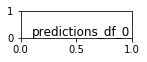

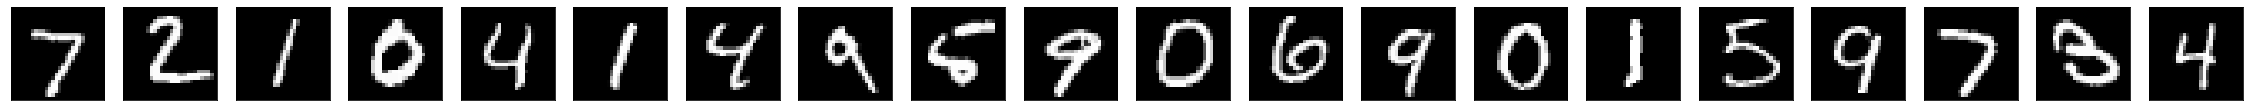

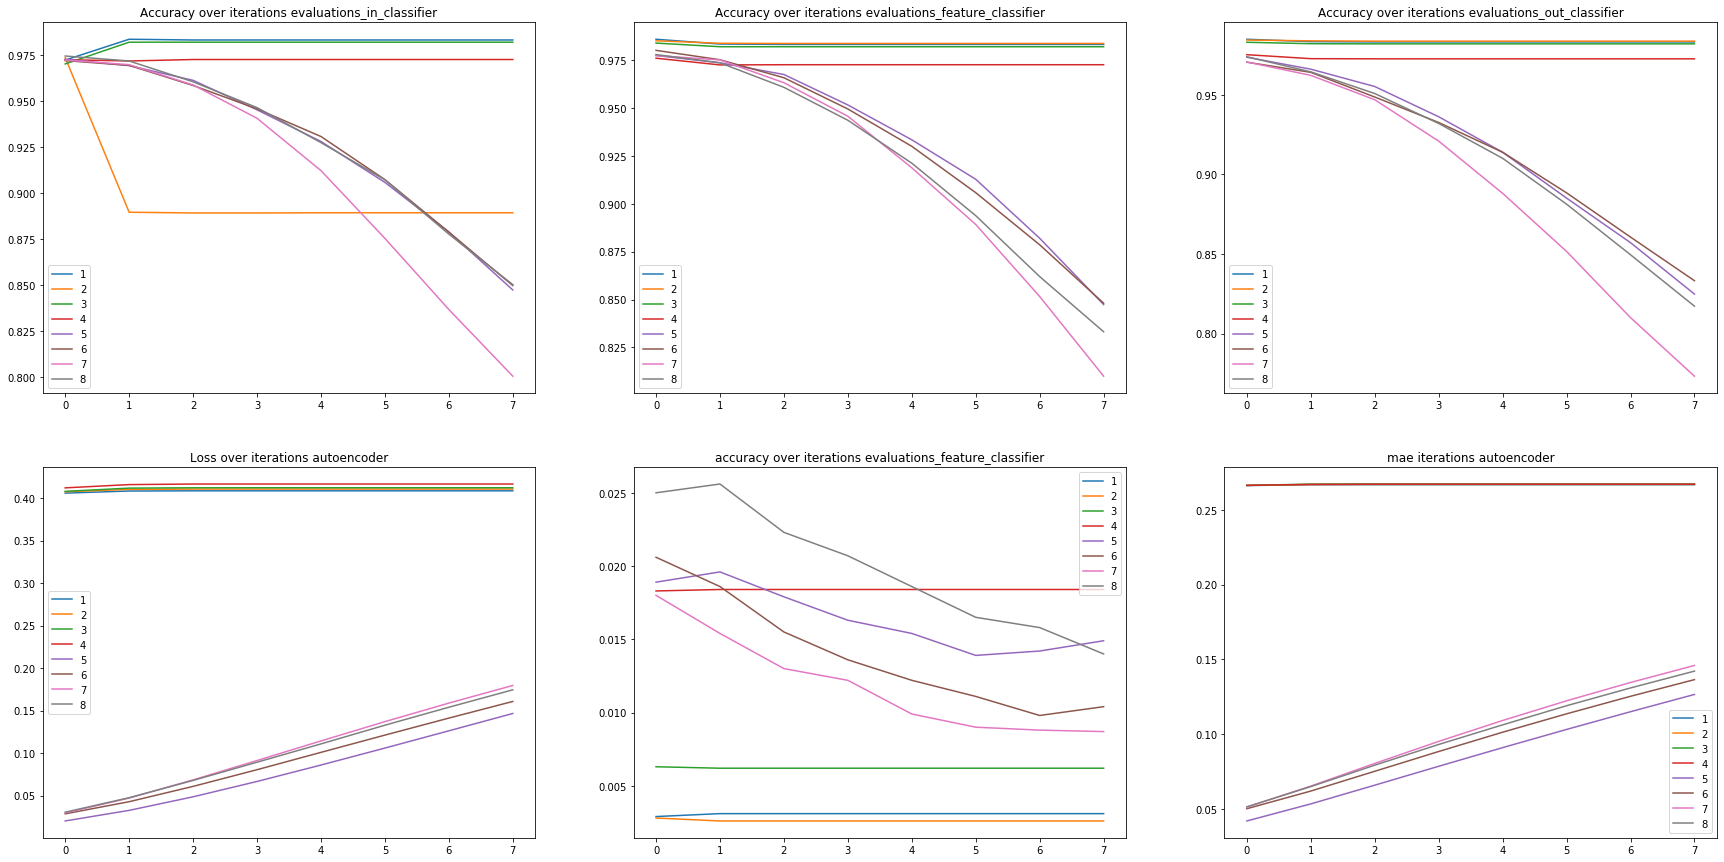

1 pmap({'batch_size': 256, 'iteration': False, 'autoencoder_type': 'Over_dim', 'targets_type': '10_Targets', 'epochs': 250, 'seed': 677719408})
2 pmap({'batch_size': 128, 'iteration': False, 'autoencoder_type': 'Over_dim', 'targets_type': '10_Targets', 'epochs': 250, 'seed': 351398964})
3 pmap({'batch_size': 64, 'iteration': False, 'autoencoder_type': 'Over_dim', 'targets_type': '10_Targets', 'epochs': 250, 'seed': 560865629})
4 pmap({'batch_size': 32, 'iteration': False, 'autoencoder_type': 'Over_dim', 'targets_type': '10_Targets', 'epochs': 250, 'seed': 65423698})
5 pmap({'batch_size': 256, 'iteration': False, 'autoencoder_type': 'Over_dim', 'targets_type': 'Mnist', 'epochs': 250, 'seed': 591256286})
6 pmap({'batch_size': 128, 'iteration': False, 'autoencoder_type': 'Over_dim', 'targets_type': 'Mnist', 'epochs': 250, 'seed': 21338333})
7 pmap({'batch_size': 64, 'iteration': False, 'autoencoder_type': 'Over_dim', 'targets_type': 'Mnist', 'epochs': 250, 'seed': 989316668})
8 pmap({'bat

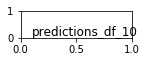

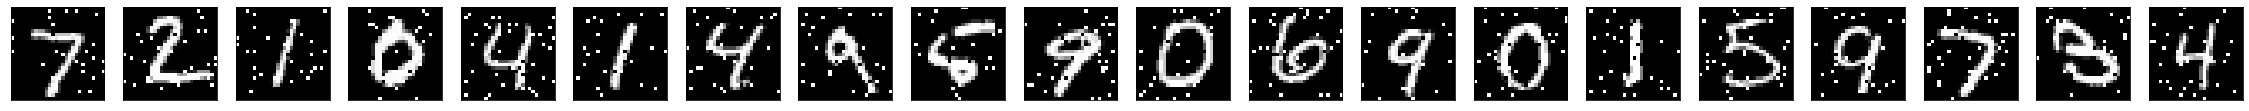

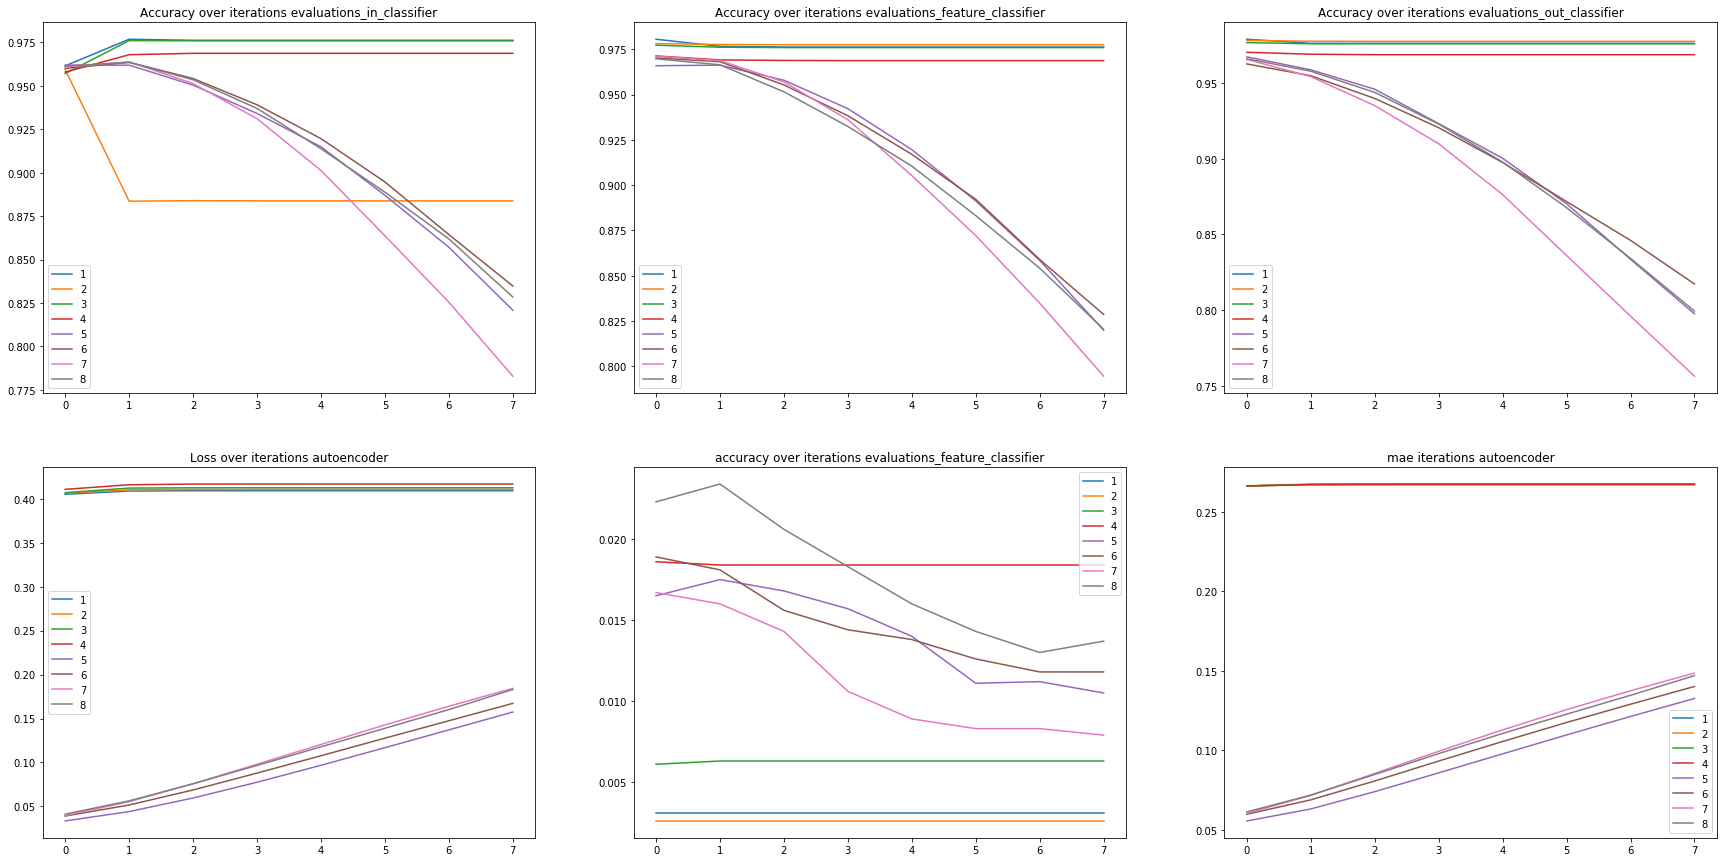

1 pmap({'batch_size': 256, 'iteration': False, 'autoencoder_type': 'Over_dim', 'targets_type': '10_Targets', 'epochs': 250, 'seed': 677719408})
2 pmap({'batch_size': 128, 'iteration': False, 'autoencoder_type': 'Over_dim', 'targets_type': '10_Targets', 'epochs': 250, 'seed': 351398964})
3 pmap({'batch_size': 64, 'iteration': False, 'autoencoder_type': 'Over_dim', 'targets_type': '10_Targets', 'epochs': 250, 'seed': 560865629})
4 pmap({'batch_size': 32, 'iteration': False, 'autoencoder_type': 'Over_dim', 'targets_type': '10_Targets', 'epochs': 250, 'seed': 65423698})
5 pmap({'batch_size': 256, 'iteration': False, 'autoencoder_type': 'Over_dim', 'targets_type': 'Mnist', 'epochs': 250, 'seed': 591256286})
6 pmap({'batch_size': 128, 'iteration': False, 'autoencoder_type': 'Over_dim', 'targets_type': 'Mnist', 'epochs': 250, 'seed': 21338333})
7 pmap({'batch_size': 64, 'iteration': False, 'autoencoder_type': 'Over_dim', 'targets_type': 'Mnist', 'epochs': 250, 'seed': 989316668})
8 pmap({'bat

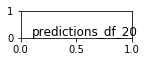

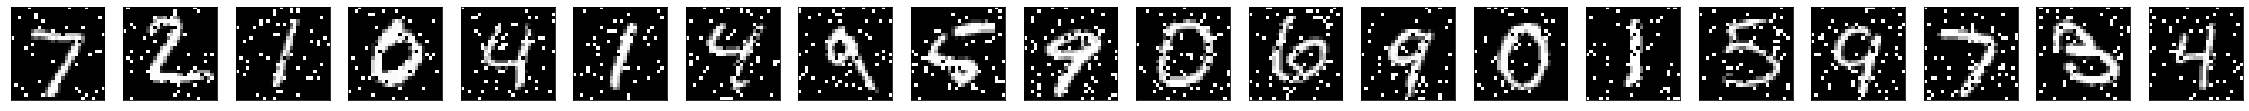

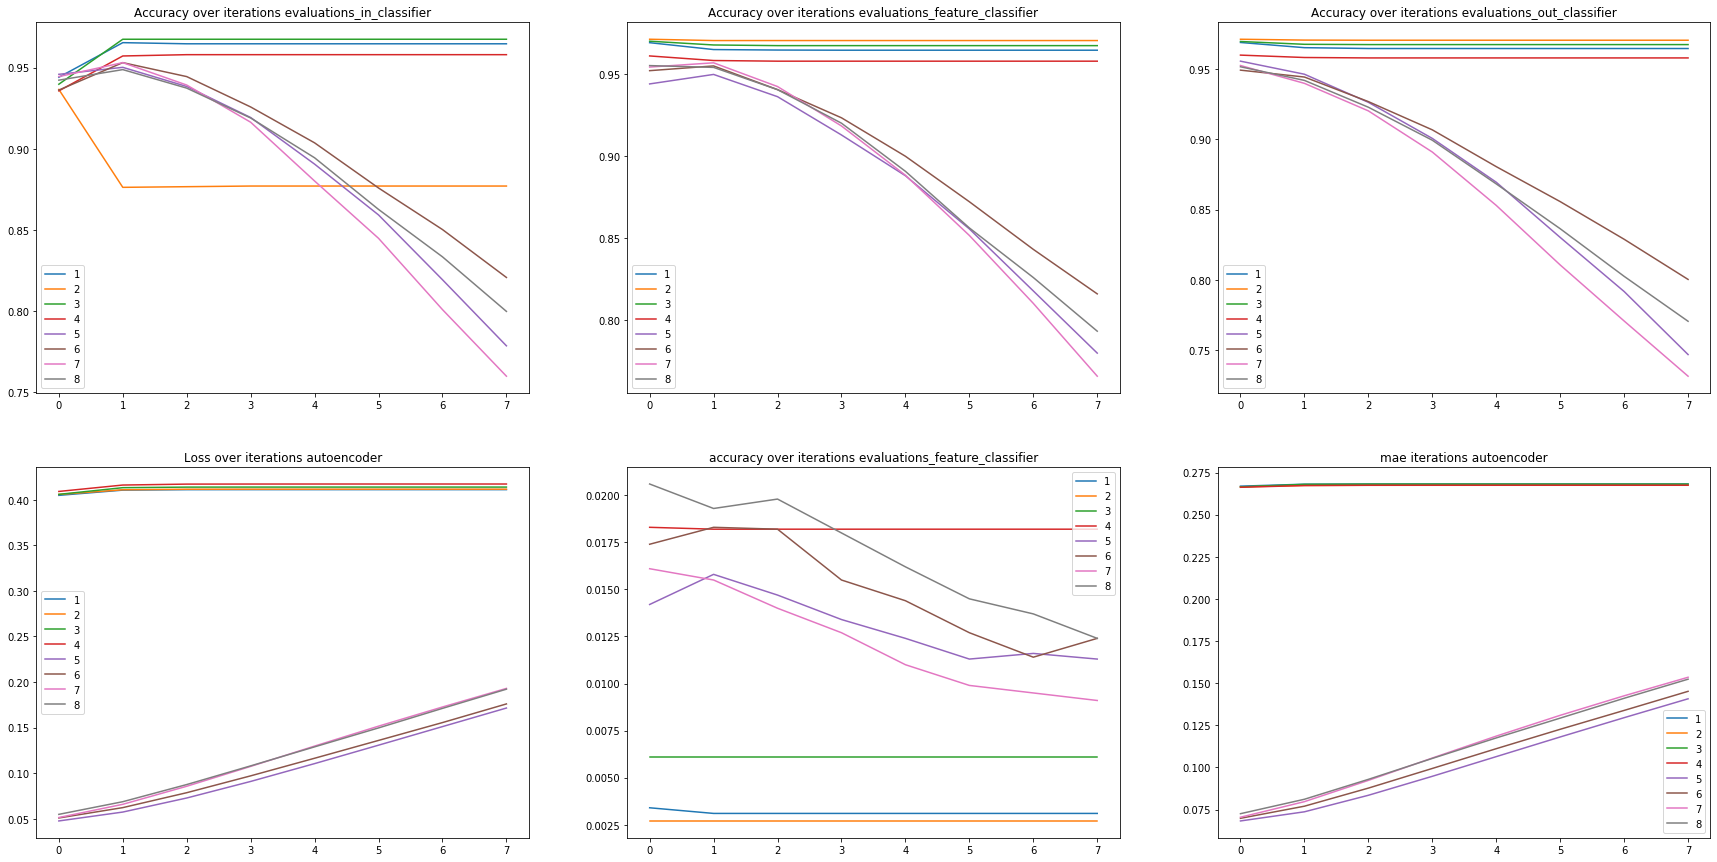

1 pmap({'batch_size': 256, 'iteration': False, 'autoencoder_type': 'Over_dim', 'targets_type': '10_Targets', 'epochs': 250, 'seed': 677719408})
2 pmap({'batch_size': 128, 'iteration': False, 'autoencoder_type': 'Over_dim', 'targets_type': '10_Targets', 'epochs': 250, 'seed': 351398964})
3 pmap({'batch_size': 64, 'iteration': False, 'autoencoder_type': 'Over_dim', 'targets_type': '10_Targets', 'epochs': 250, 'seed': 560865629})
4 pmap({'batch_size': 32, 'iteration': False, 'autoencoder_type': 'Over_dim', 'targets_type': '10_Targets', 'epochs': 250, 'seed': 65423698})
5 pmap({'batch_size': 256, 'iteration': False, 'autoencoder_type': 'Over_dim', 'targets_type': 'Mnist', 'epochs': 250, 'seed': 591256286})
6 pmap({'batch_size': 128, 'iteration': False, 'autoencoder_type': 'Over_dim', 'targets_type': 'Mnist', 'epochs': 250, 'seed': 21338333})
7 pmap({'batch_size': 64, 'iteration': False, 'autoencoder_type': 'Over_dim', 'targets_type': 'Mnist', 'epochs': 250, 'seed': 989316668})
8 pmap({'bat

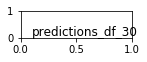

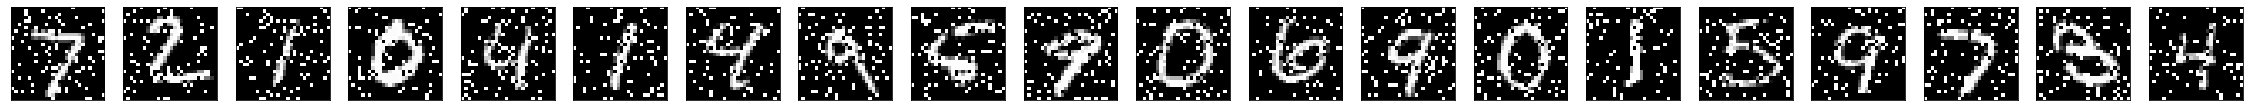

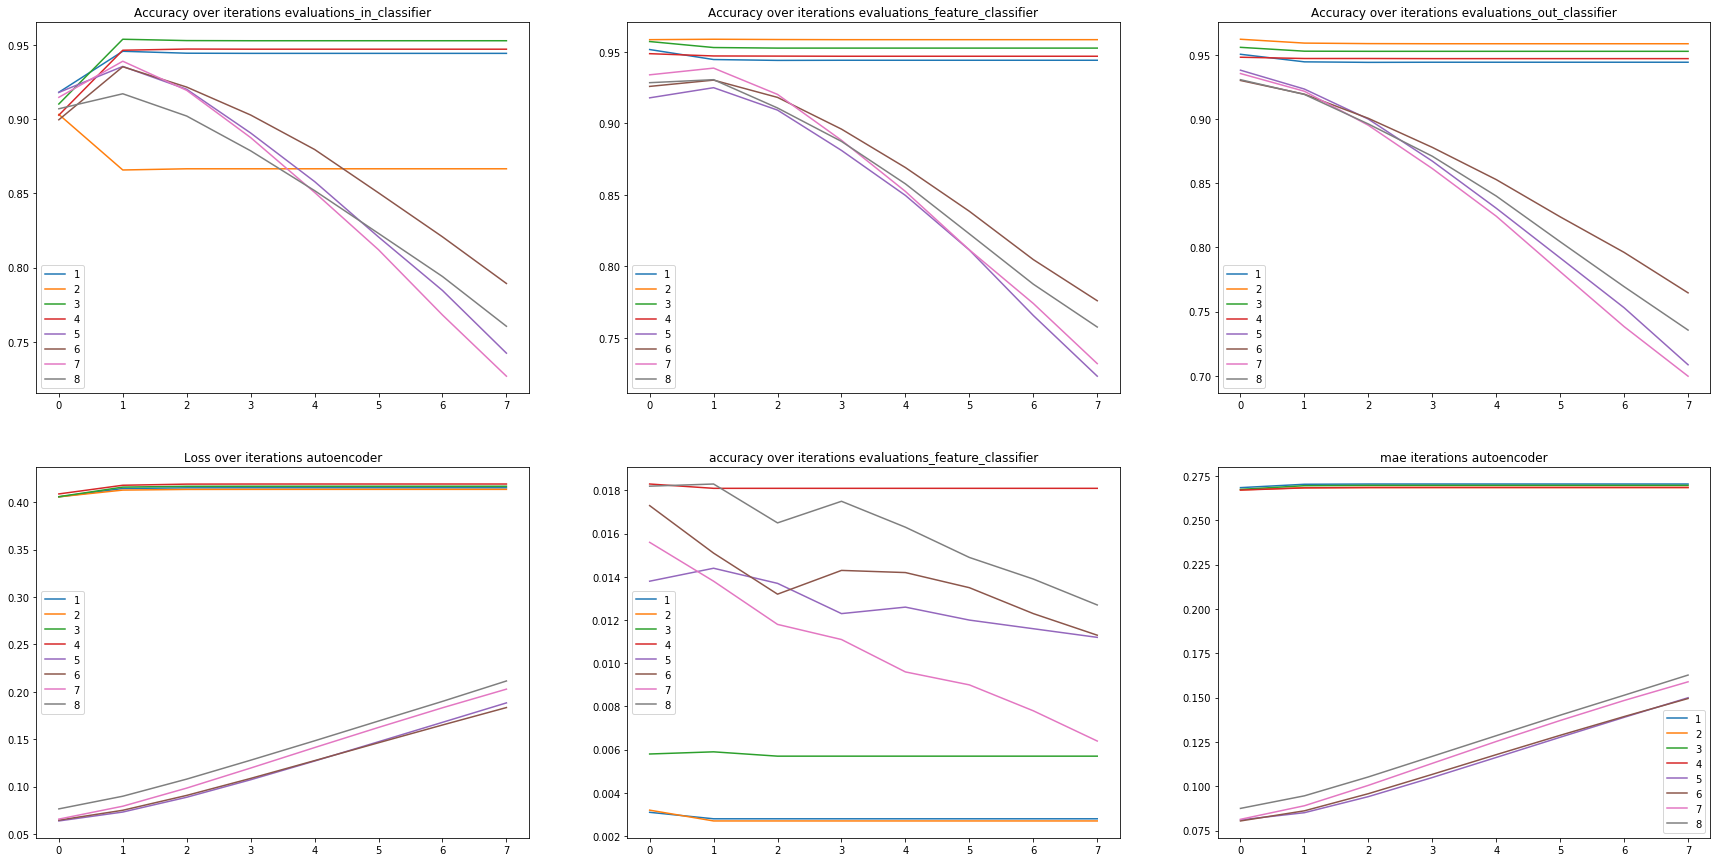

1 pmap({'batch_size': 256, 'iteration': False, 'autoencoder_type': 'Over_dim', 'targets_type': '10_Targets', 'epochs': 250, 'seed': 677719408})
2 pmap({'batch_size': 128, 'iteration': False, 'autoencoder_type': 'Over_dim', 'targets_type': '10_Targets', 'epochs': 250, 'seed': 351398964})
3 pmap({'batch_size': 64, 'iteration': False, 'autoencoder_type': 'Over_dim', 'targets_type': '10_Targets', 'epochs': 250, 'seed': 560865629})
4 pmap({'batch_size': 32, 'iteration': False, 'autoencoder_type': 'Over_dim', 'targets_type': '10_Targets', 'epochs': 250, 'seed': 65423698})
5 pmap({'batch_size': 256, 'iteration': False, 'autoencoder_type': 'Over_dim', 'targets_type': 'Mnist', 'epochs': 250, 'seed': 591256286})
6 pmap({'batch_size': 128, 'iteration': False, 'autoencoder_type': 'Over_dim', 'targets_type': 'Mnist', 'epochs': 250, 'seed': 21338333})
7 pmap({'batch_size': 64, 'iteration': False, 'autoencoder_type': 'Over_dim', 'targets_type': 'Mnist', 'epochs': 250, 'seed': 989316668})
8 pmap({'bat

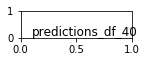

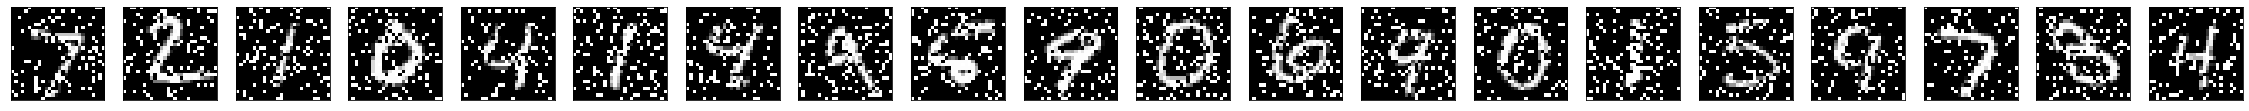

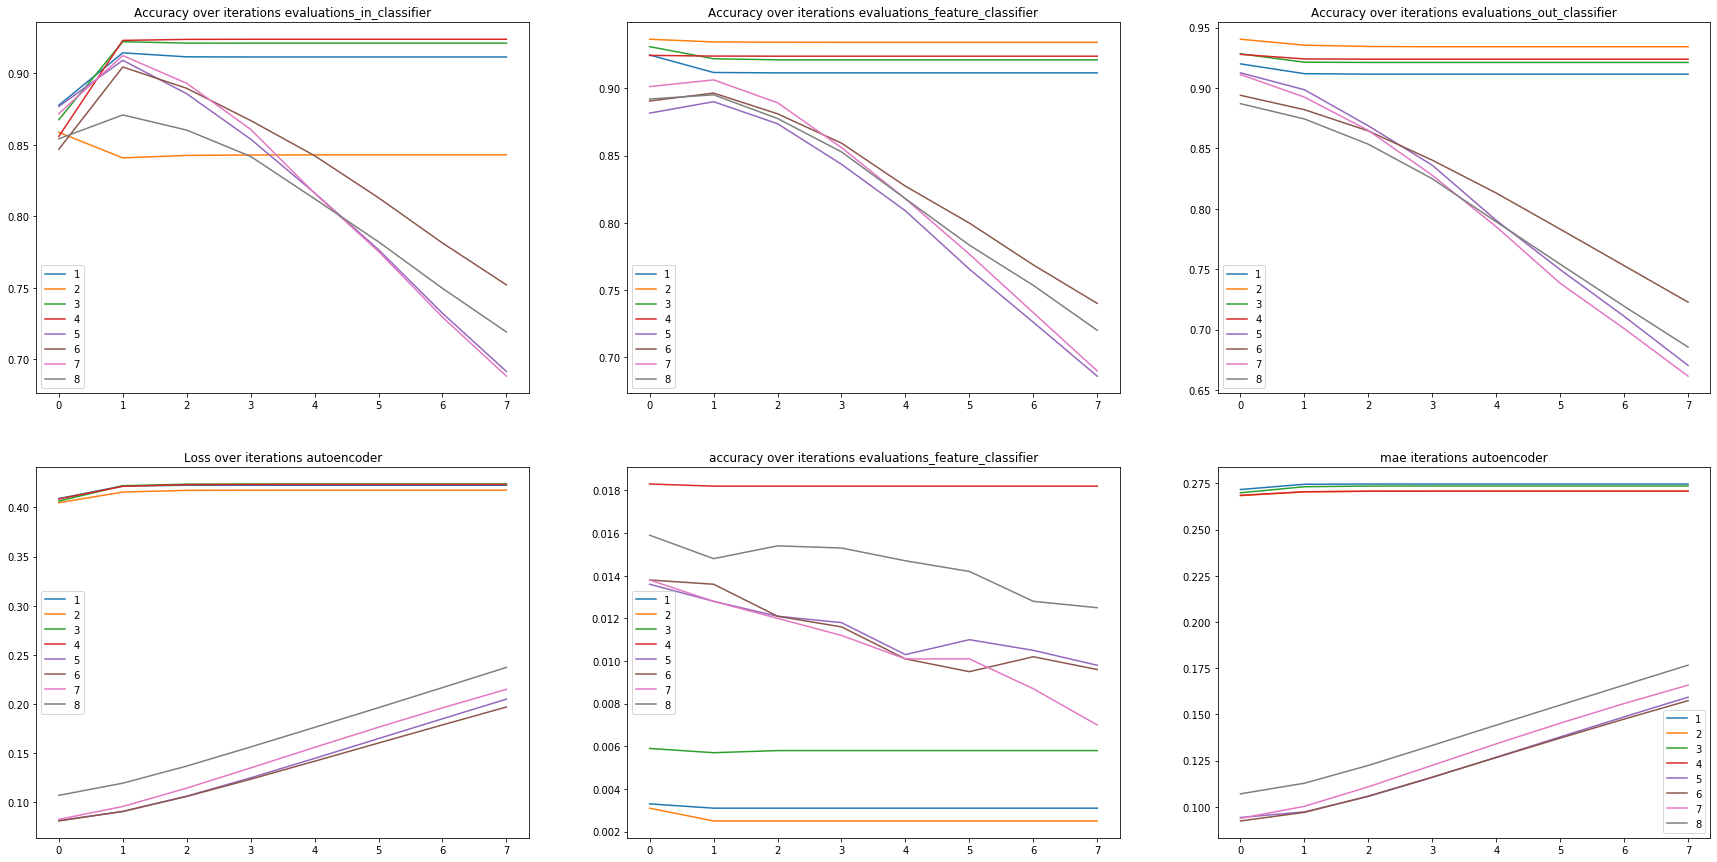

1 pmap({'batch_size': 256, 'iteration': False, 'autoencoder_type': 'Over_dim', 'targets_type': '10_Targets', 'epochs': 250, 'seed': 677719408})
2 pmap({'batch_size': 128, 'iteration': False, 'autoencoder_type': 'Over_dim', 'targets_type': '10_Targets', 'epochs': 250, 'seed': 351398964})
3 pmap({'batch_size': 64, 'iteration': False, 'autoencoder_type': 'Over_dim', 'targets_type': '10_Targets', 'epochs': 250, 'seed': 560865629})
4 pmap({'batch_size': 32, 'iteration': False, 'autoencoder_type': 'Over_dim', 'targets_type': '10_Targets', 'epochs': 250, 'seed': 65423698})
5 pmap({'batch_size': 256, 'iteration': False, 'autoencoder_type': 'Over_dim', 'targets_type': 'Mnist', 'epochs': 250, 'seed': 591256286})
6 pmap({'batch_size': 128, 'iteration': False, 'autoencoder_type': 'Over_dim', 'targets_type': 'Mnist', 'epochs': 250, 'seed': 21338333})
7 pmap({'batch_size': 64, 'iteration': False, 'autoencoder_type': 'Over_dim', 'targets_type': 'Mnist', 'epochs': 250, 'seed': 989316668})
8 pmap({'bat

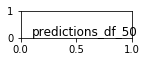

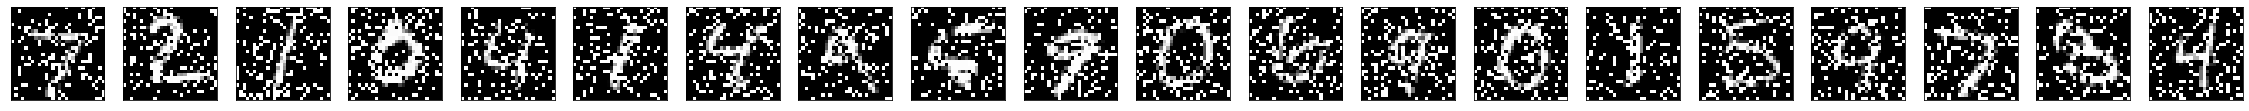

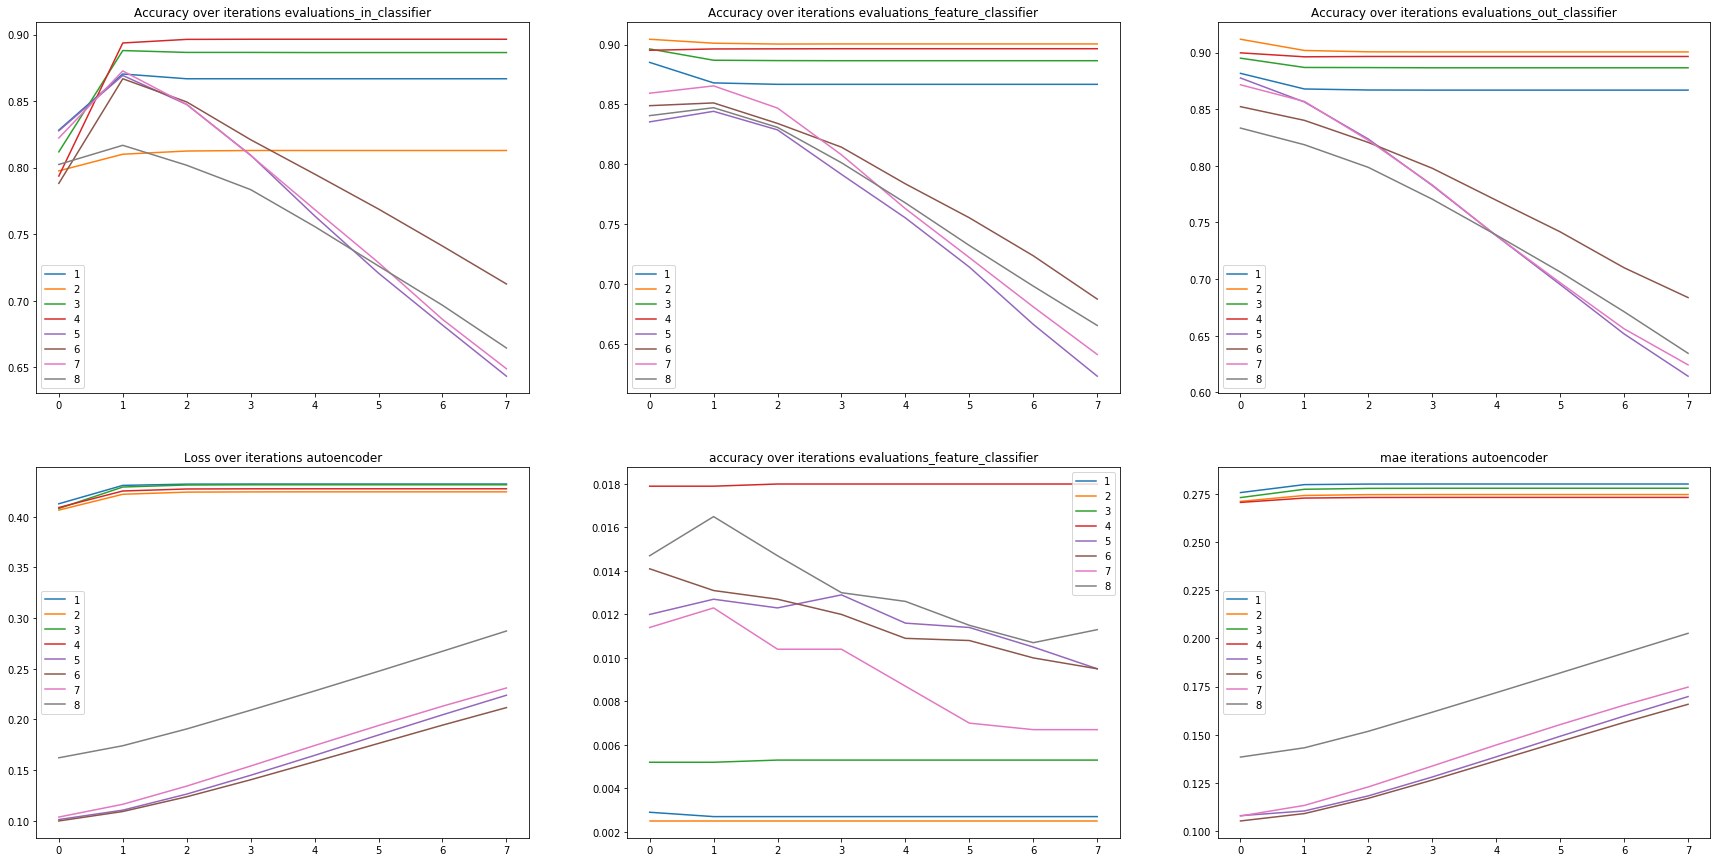

1 pmap({'batch_size': 256, 'iteration': False, 'autoencoder_type': 'Over_dim', 'targets_type': '10_Targets', 'epochs': 250, 'seed': 677719408})
2 pmap({'batch_size': 128, 'iteration': False, 'autoencoder_type': 'Over_dim', 'targets_type': '10_Targets', 'epochs': 250, 'seed': 351398964})
3 pmap({'batch_size': 64, 'iteration': False, 'autoencoder_type': 'Over_dim', 'targets_type': '10_Targets', 'epochs': 250, 'seed': 560865629})
4 pmap({'batch_size': 32, 'iteration': False, 'autoencoder_type': 'Over_dim', 'targets_type': '10_Targets', 'epochs': 250, 'seed': 65423698})
5 pmap({'batch_size': 256, 'iteration': False, 'autoencoder_type': 'Over_dim', 'targets_type': 'Mnist', 'epochs': 250, 'seed': 591256286})
6 pmap({'batch_size': 128, 'iteration': False, 'autoencoder_type': 'Over_dim', 'targets_type': 'Mnist', 'epochs': 250, 'seed': 21338333})
7 pmap({'batch_size': 64, 'iteration': False, 'autoencoder_type': 'Over_dim', 'targets_type': 'Mnist', 'epochs': 250, 'seed': 989316668})
8 pmap({'bat

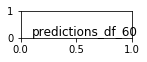

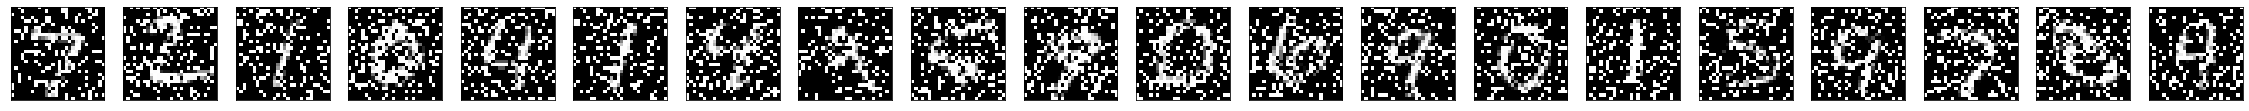

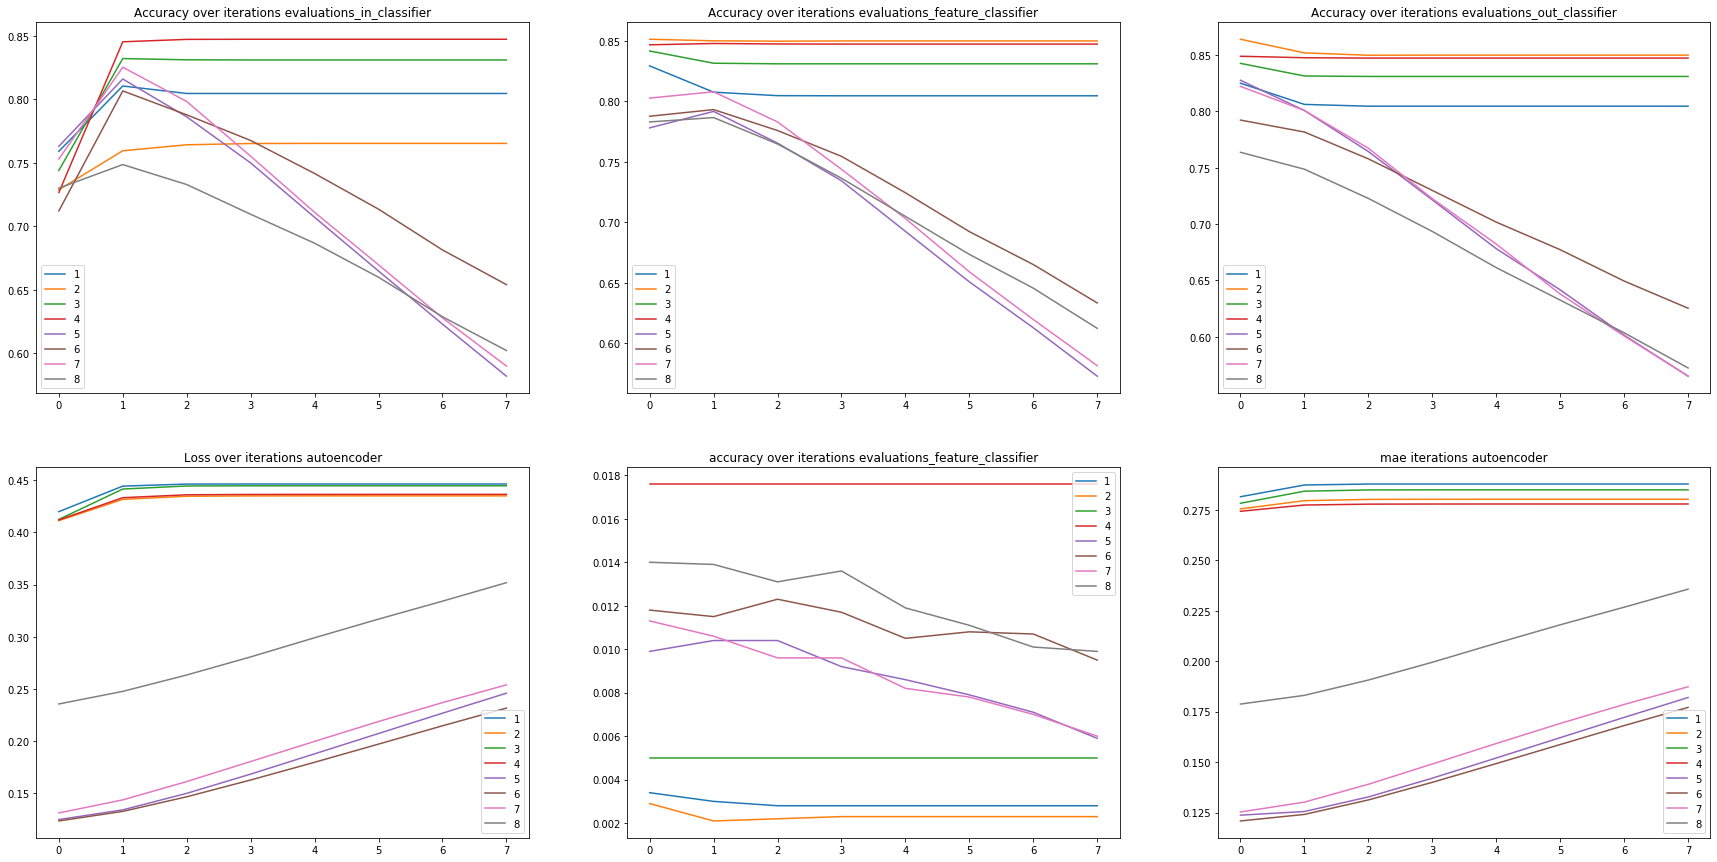

1 pmap({'batch_size': 256, 'iteration': False, 'autoencoder_type': 'Over_dim', 'targets_type': '10_Targets', 'epochs': 250, 'seed': 677719408})
2 pmap({'batch_size': 128, 'iteration': False, 'autoencoder_type': 'Over_dim', 'targets_type': '10_Targets', 'epochs': 250, 'seed': 351398964})
3 pmap({'batch_size': 64, 'iteration': False, 'autoencoder_type': 'Over_dim', 'targets_type': '10_Targets', 'epochs': 250, 'seed': 560865629})
4 pmap({'batch_size': 32, 'iteration': False, 'autoencoder_type': 'Over_dim', 'targets_type': '10_Targets', 'epochs': 250, 'seed': 65423698})
5 pmap({'batch_size': 256, 'iteration': False, 'autoencoder_type': 'Over_dim', 'targets_type': 'Mnist', 'epochs': 250, 'seed': 591256286})
6 pmap({'batch_size': 128, 'iteration': False, 'autoencoder_type': 'Over_dim', 'targets_type': 'Mnist', 'epochs': 250, 'seed': 21338333})
7 pmap({'batch_size': 64, 'iteration': False, 'autoencoder_type': 'Over_dim', 'targets_type': 'Mnist', 'epochs': 250, 'seed': 989316668})
8 pmap({'bat

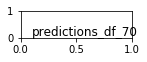

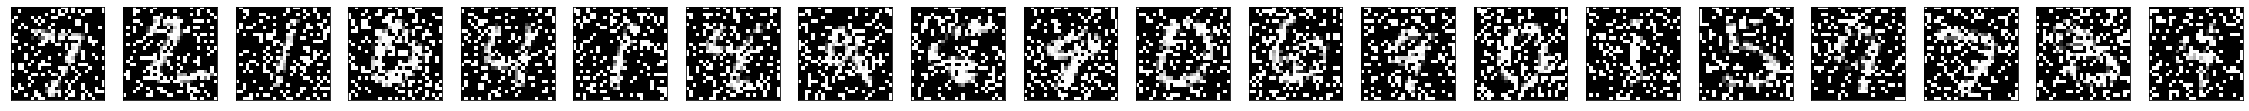

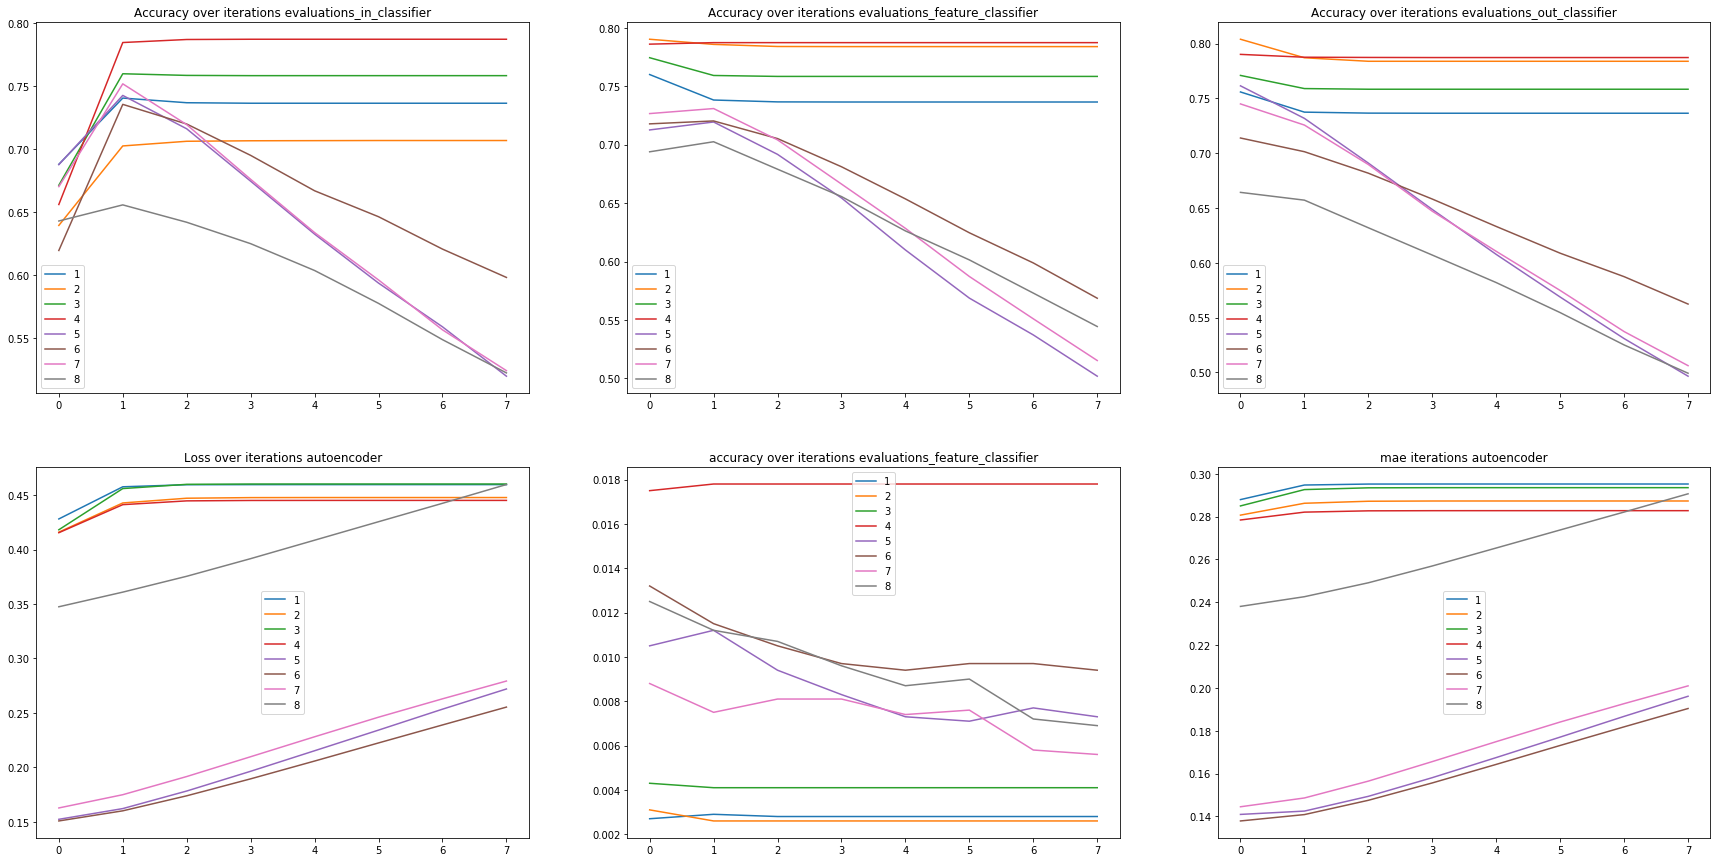

1 pmap({'batch_size': 256, 'iteration': False, 'autoencoder_type': 'Over_dim', 'targets_type': '10_Targets', 'epochs': 250, 'seed': 677719408})
2 pmap({'batch_size': 128, 'iteration': False, 'autoencoder_type': 'Over_dim', 'targets_type': '10_Targets', 'epochs': 250, 'seed': 351398964})
3 pmap({'batch_size': 64, 'iteration': False, 'autoencoder_type': 'Over_dim', 'targets_type': '10_Targets', 'epochs': 250, 'seed': 560865629})
4 pmap({'batch_size': 32, 'iteration': False, 'autoencoder_type': 'Over_dim', 'targets_type': '10_Targets', 'epochs': 250, 'seed': 65423698})
5 pmap({'batch_size': 256, 'iteration': False, 'autoencoder_type': 'Over_dim', 'targets_type': 'Mnist', 'epochs': 250, 'seed': 591256286})
6 pmap({'batch_size': 128, 'iteration': False, 'autoencoder_type': 'Over_dim', 'targets_type': 'Mnist', 'epochs': 250, 'seed': 21338333})
7 pmap({'batch_size': 64, 'iteration': False, 'autoencoder_type': 'Over_dim', 'targets_type': 'Mnist', 'epochs': 250, 'seed': 989316668})
8 pmap({'bat

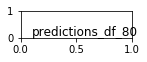

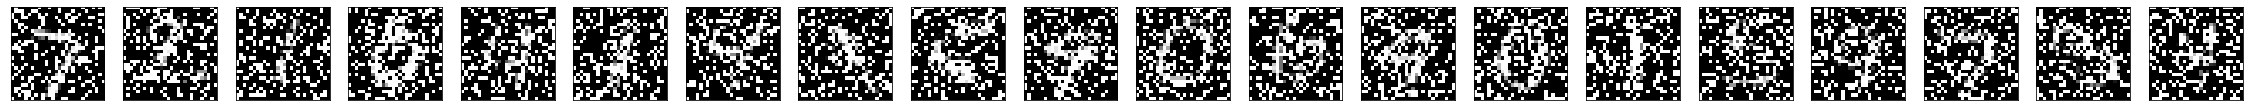

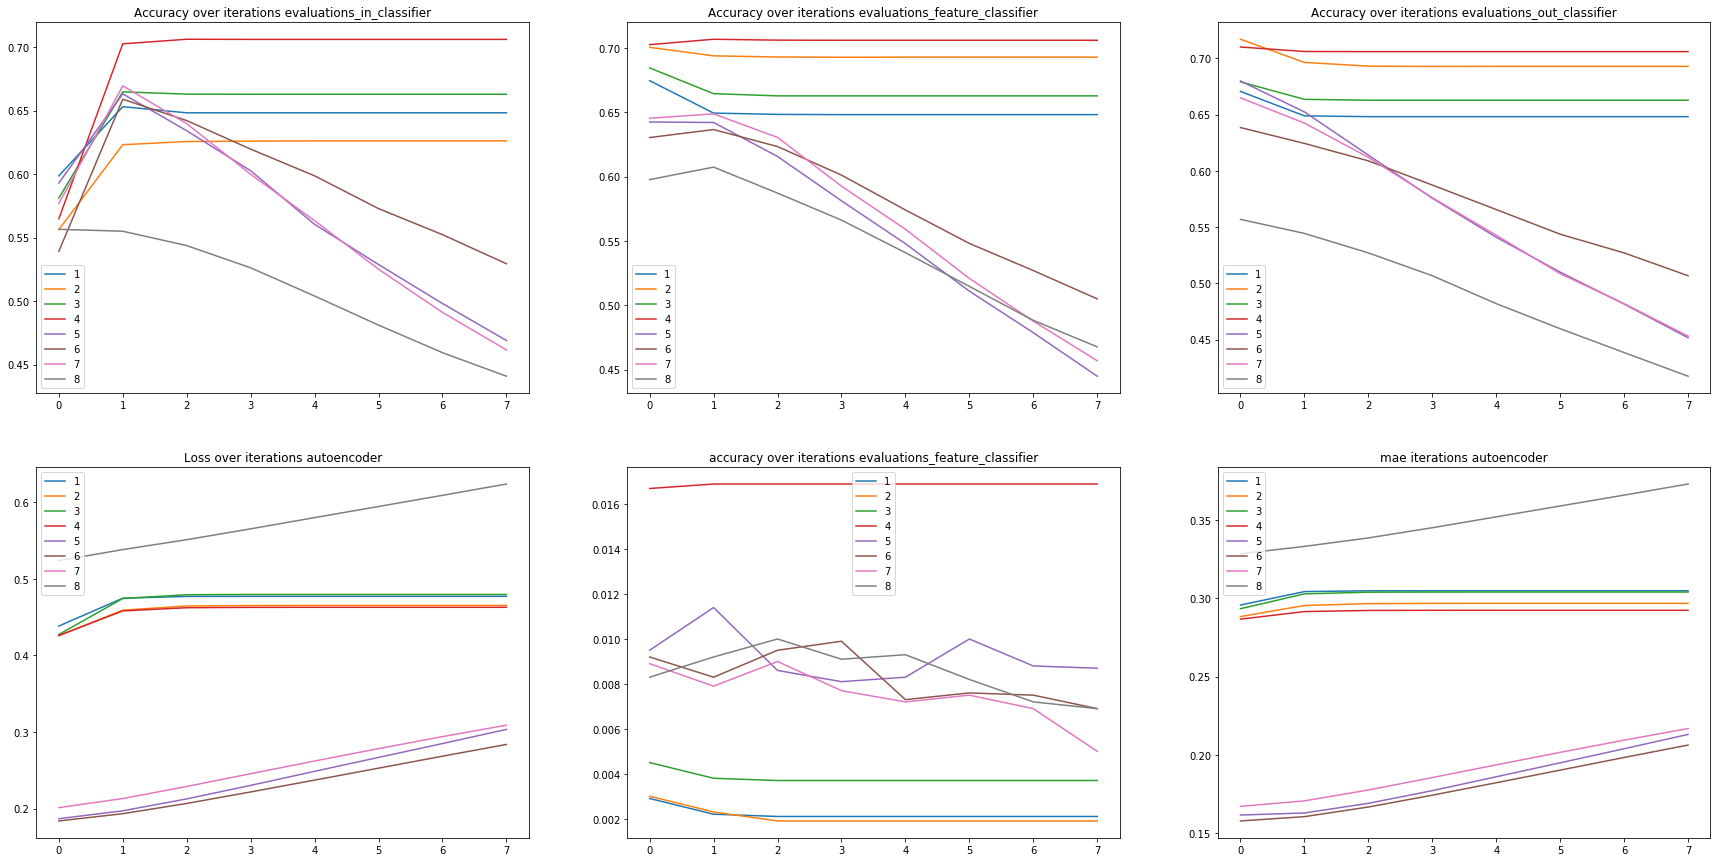

1 pmap({'batch_size': 256, 'iteration': False, 'autoencoder_type': 'Over_dim', 'targets_type': '10_Targets', 'epochs': 250, 'seed': 677719408})
2 pmap({'batch_size': 128, 'iteration': False, 'autoencoder_type': 'Over_dim', 'targets_type': '10_Targets', 'epochs': 250, 'seed': 351398964})
3 pmap({'batch_size': 64, 'iteration': False, 'autoencoder_type': 'Over_dim', 'targets_type': '10_Targets', 'epochs': 250, 'seed': 560865629})
4 pmap({'batch_size': 32, 'iteration': False, 'autoencoder_type': 'Over_dim', 'targets_type': '10_Targets', 'epochs': 250, 'seed': 65423698})
5 pmap({'batch_size': 256, 'iteration': False, 'autoencoder_type': 'Over_dim', 'targets_type': 'Mnist', 'epochs': 250, 'seed': 591256286})
6 pmap({'batch_size': 128, 'iteration': False, 'autoencoder_type': 'Over_dim', 'targets_type': 'Mnist', 'epochs': 250, 'seed': 21338333})
7 pmap({'batch_size': 64, 'iteration': False, 'autoencoder_type': 'Over_dim', 'targets_type': 'Mnist', 'epochs': 250, 'seed': 989316668})
8 pmap({'bat

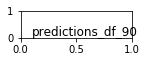

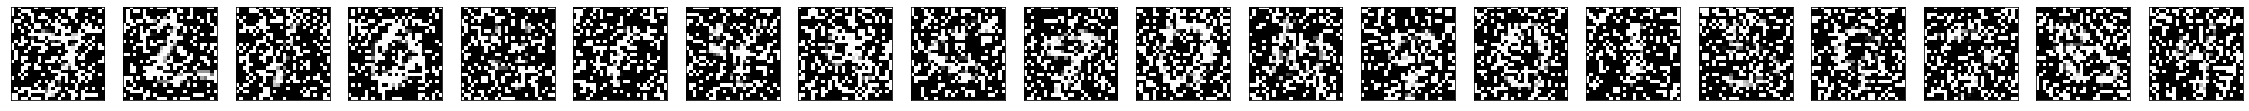

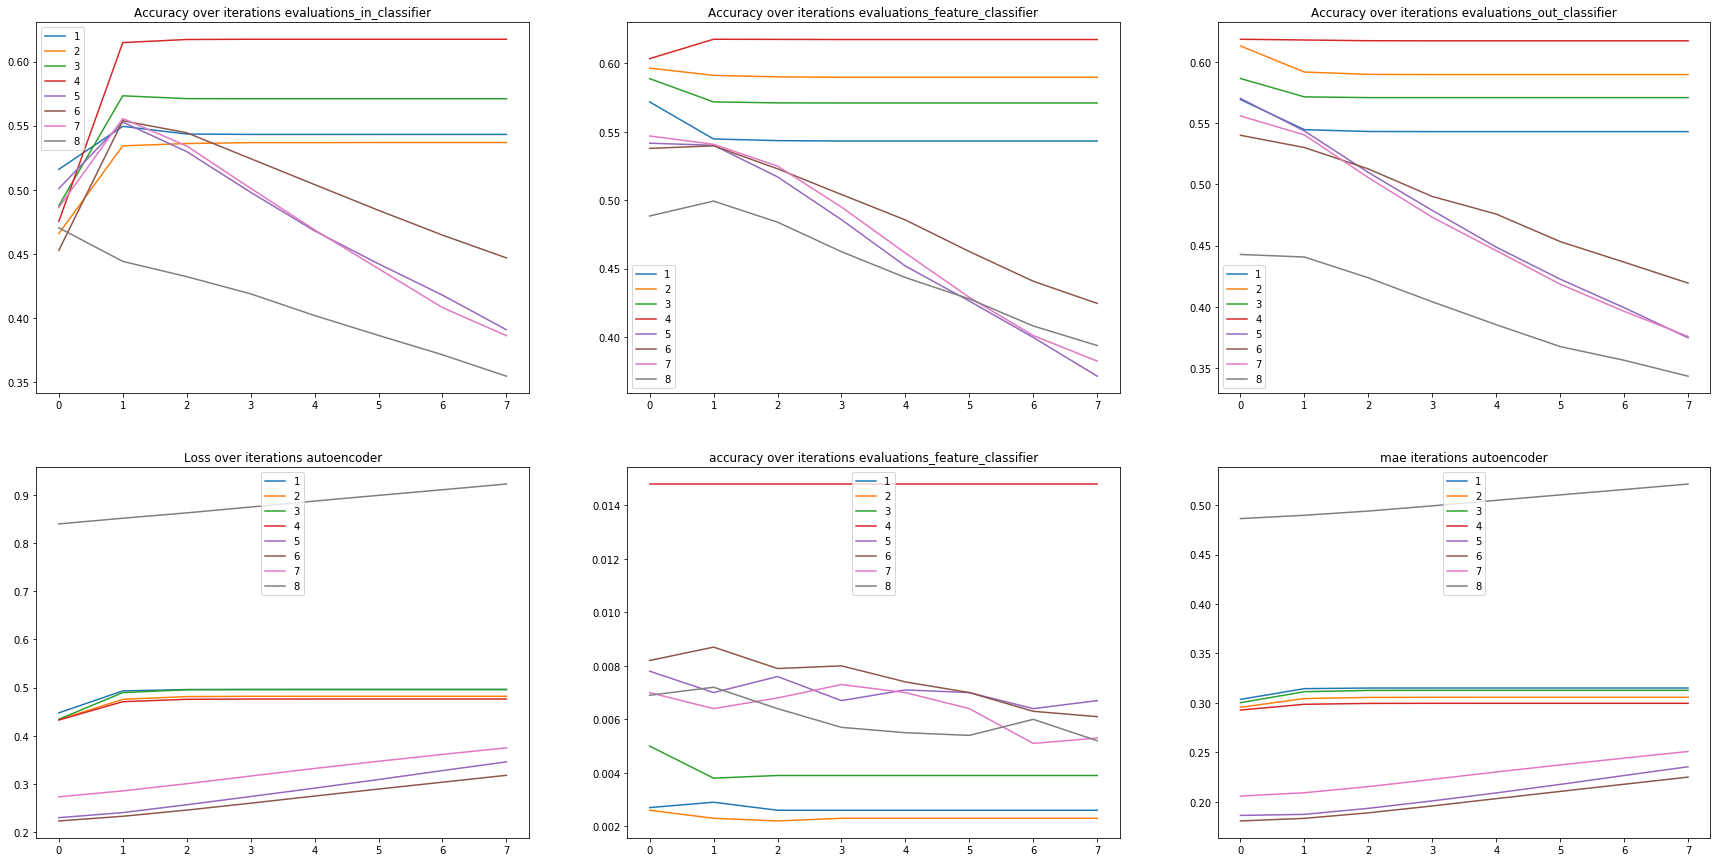

1 pmap({'batch_size': 256, 'iteration': False, 'autoencoder_type': 'Over_dim', 'targets_type': '10_Targets', 'epochs': 250, 'seed': 677719408})
2 pmap({'batch_size': 128, 'iteration': False, 'autoencoder_type': 'Over_dim', 'targets_type': '10_Targets', 'epochs': 250, 'seed': 351398964})
3 pmap({'batch_size': 64, 'iteration': False, 'autoencoder_type': 'Over_dim', 'targets_type': '10_Targets', 'epochs': 250, 'seed': 560865629})
4 pmap({'batch_size': 32, 'iteration': False, 'autoencoder_type': 'Over_dim', 'targets_type': '10_Targets', 'epochs': 250, 'seed': 65423698})
5 pmap({'batch_size': 256, 'iteration': False, 'autoencoder_type': 'Over_dim', 'targets_type': 'Mnist', 'epochs': 250, 'seed': 591256286})
6 pmap({'batch_size': 128, 'iteration': False, 'autoencoder_type': 'Over_dim', 'targets_type': 'Mnist', 'epochs': 250, 'seed': 21338333})
7 pmap({'batch_size': 64, 'iteration': False, 'autoencoder_type': 'Over_dim', 'targets_type': 'Mnist', 'epochs': 250, 'seed': 989316668})
8 pmap({'bat

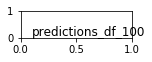

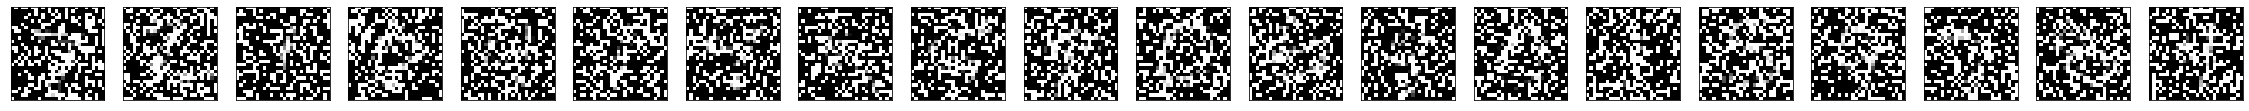

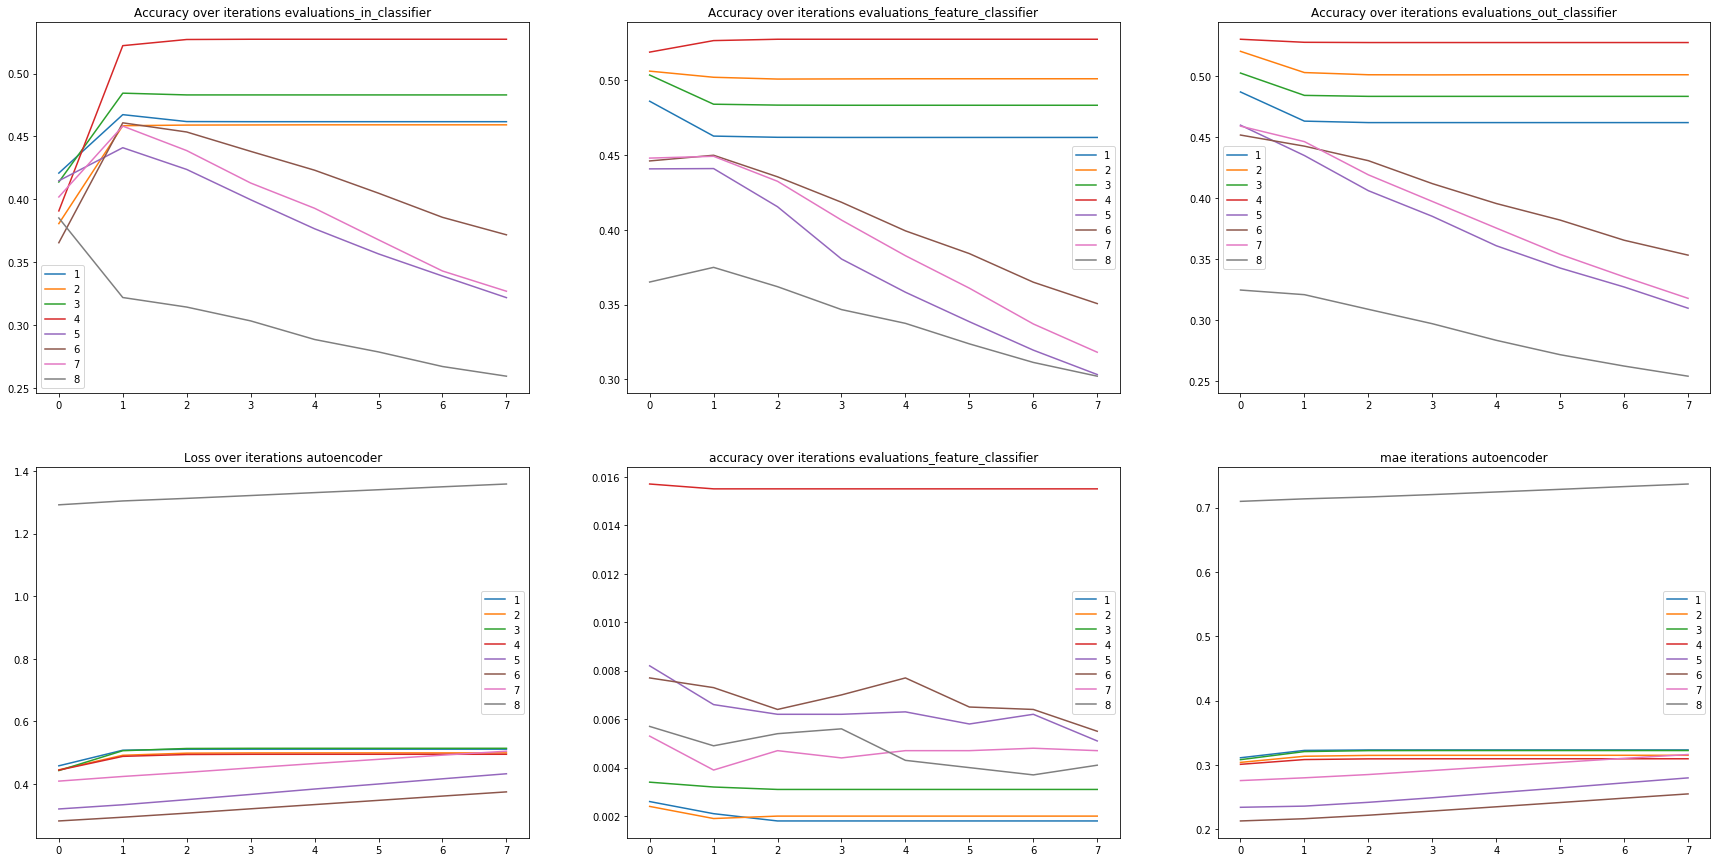

In [27]:
for index in name_list:
    compare(index)

    

In [11]:
experiments=[loader.find_by_id(2),loader.find_by_id(4)]

pmap({'autoencoder_type': 'Over_dim', 'batch_size': 128, 'targets_type': '10_Targets', 'epochs': 250, 'iteration': False, 'seed': 351398964})


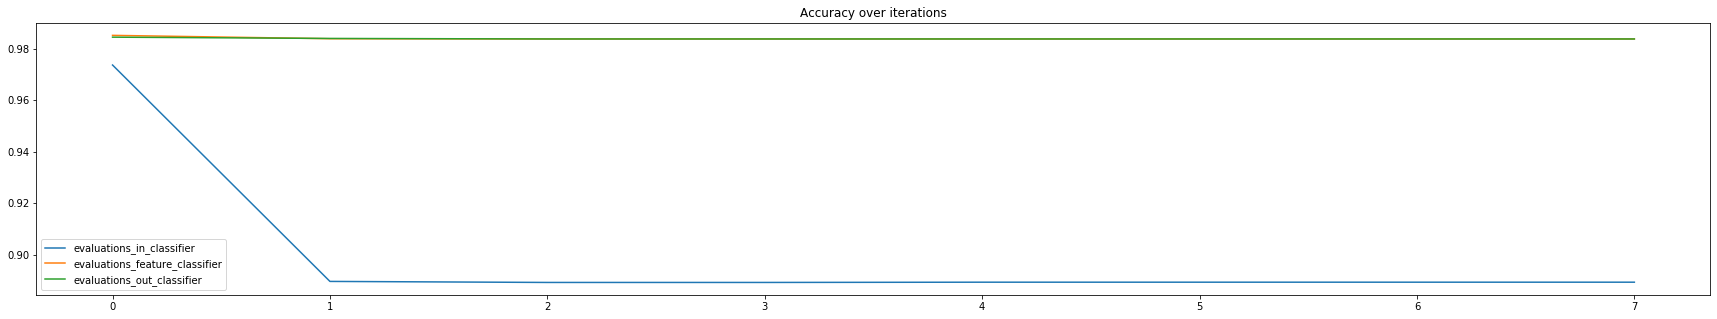

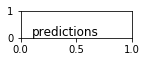

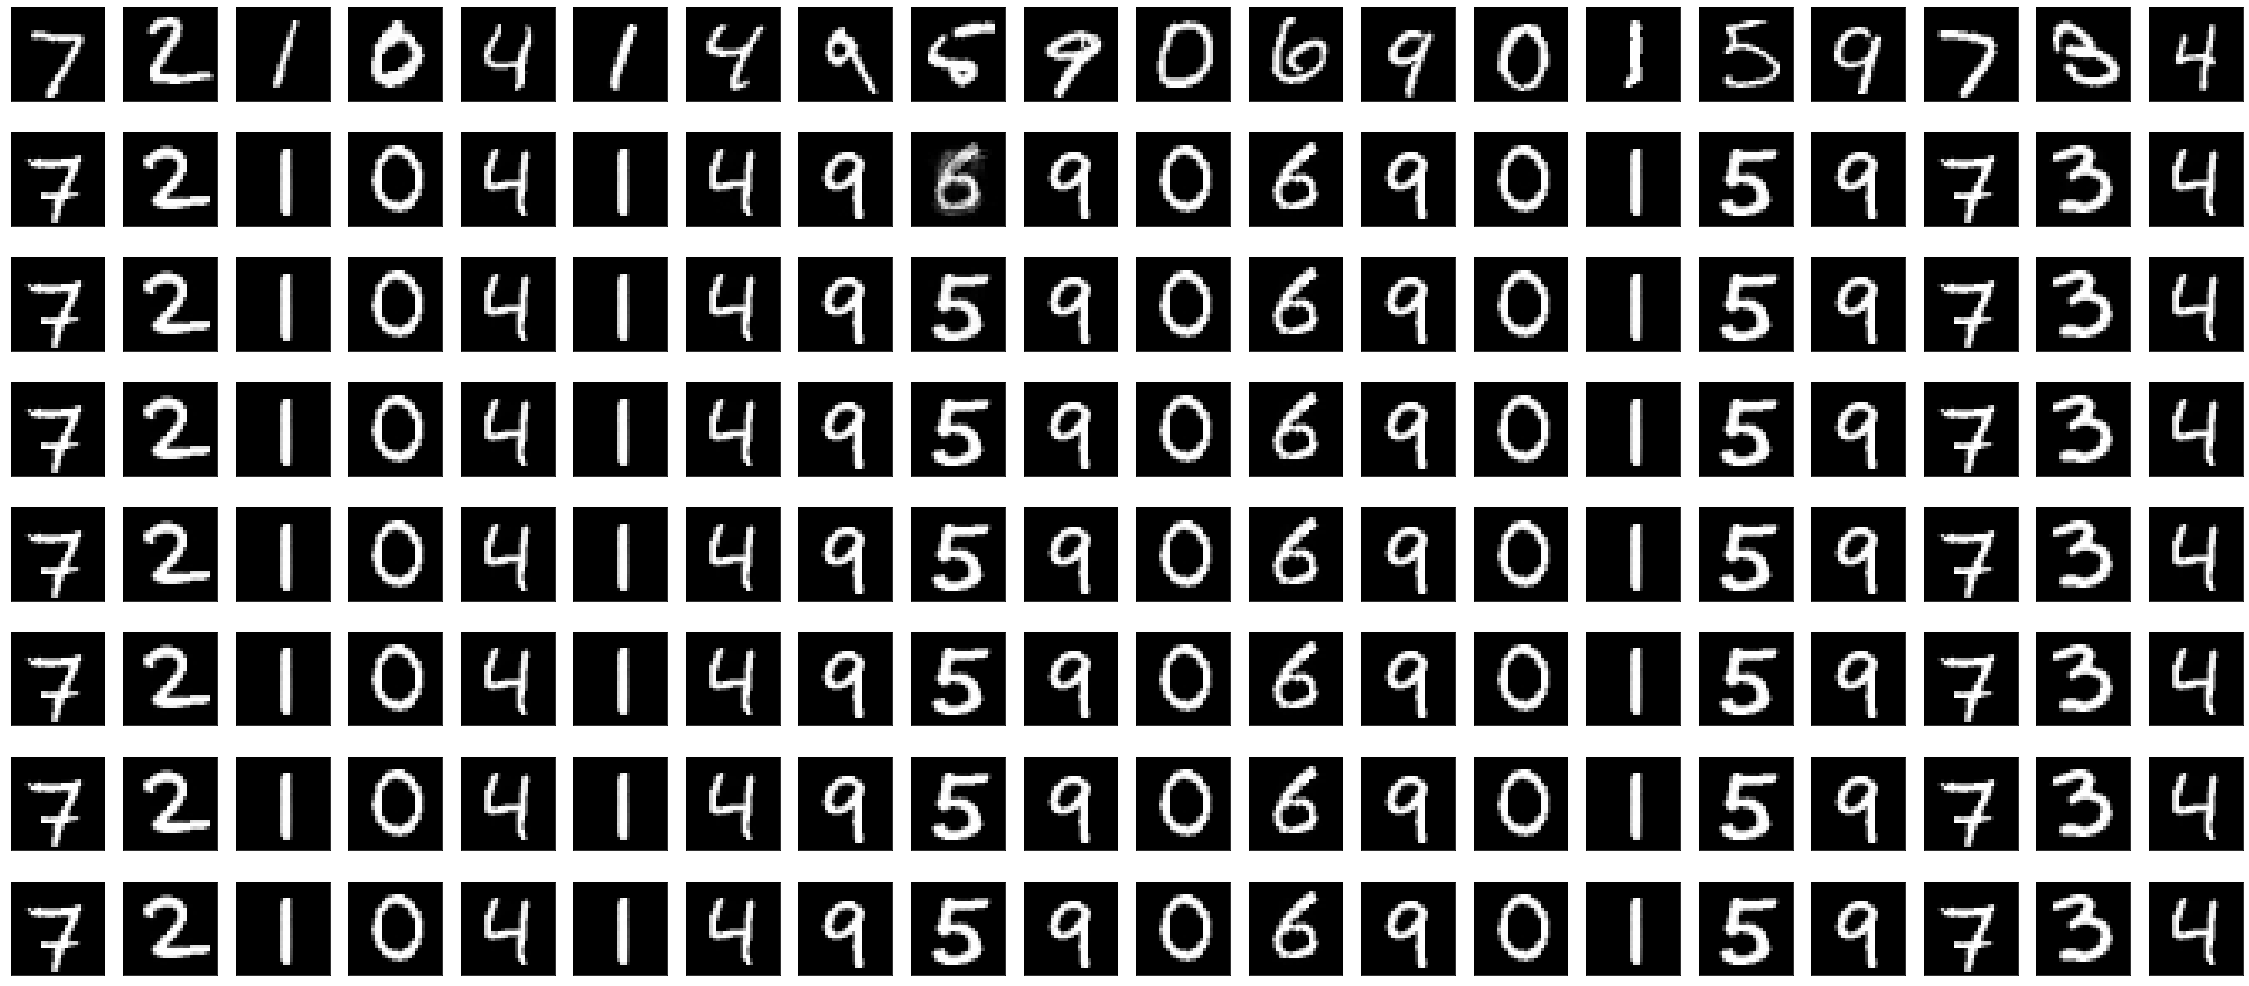

pmap({'autoencoder_type': 'Over_dim', 'batch_size': 32, 'targets_type': '10_Targets', 'epochs': 250, 'iteration': False, 'seed': 65423698})


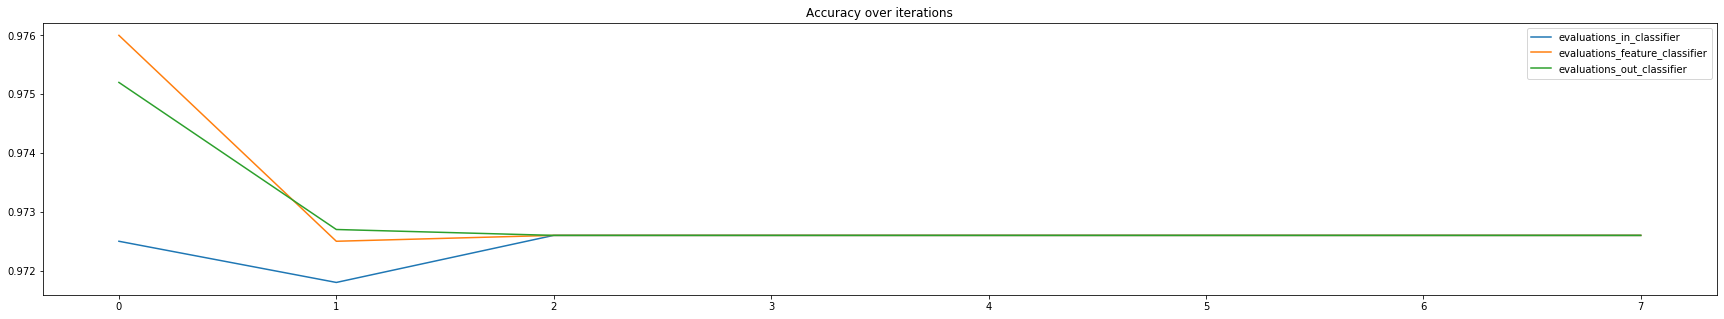

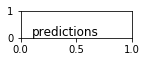

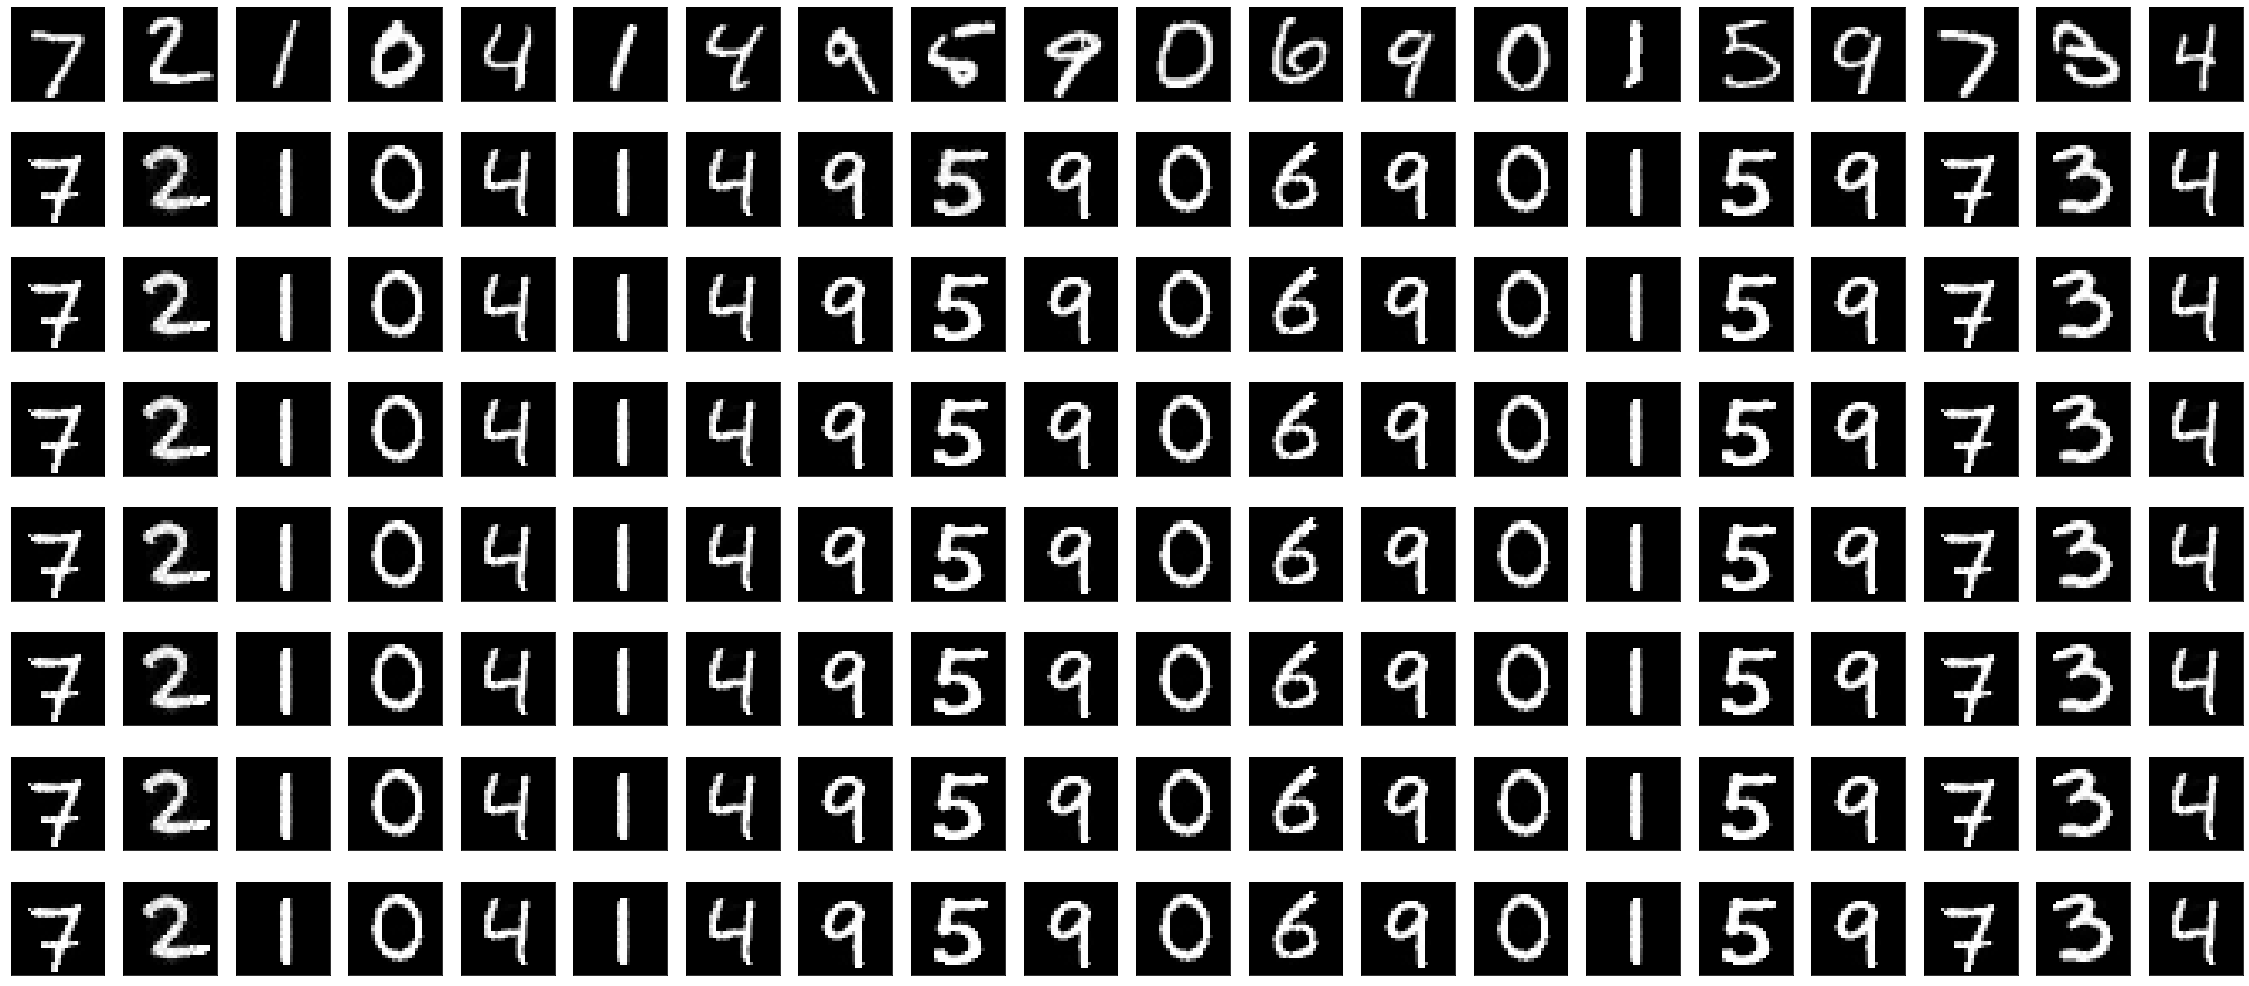

In [16]:
for exp in experiments:
    show_experiment(exp)


In [13]:
exp=experiments[0]

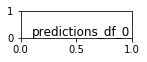

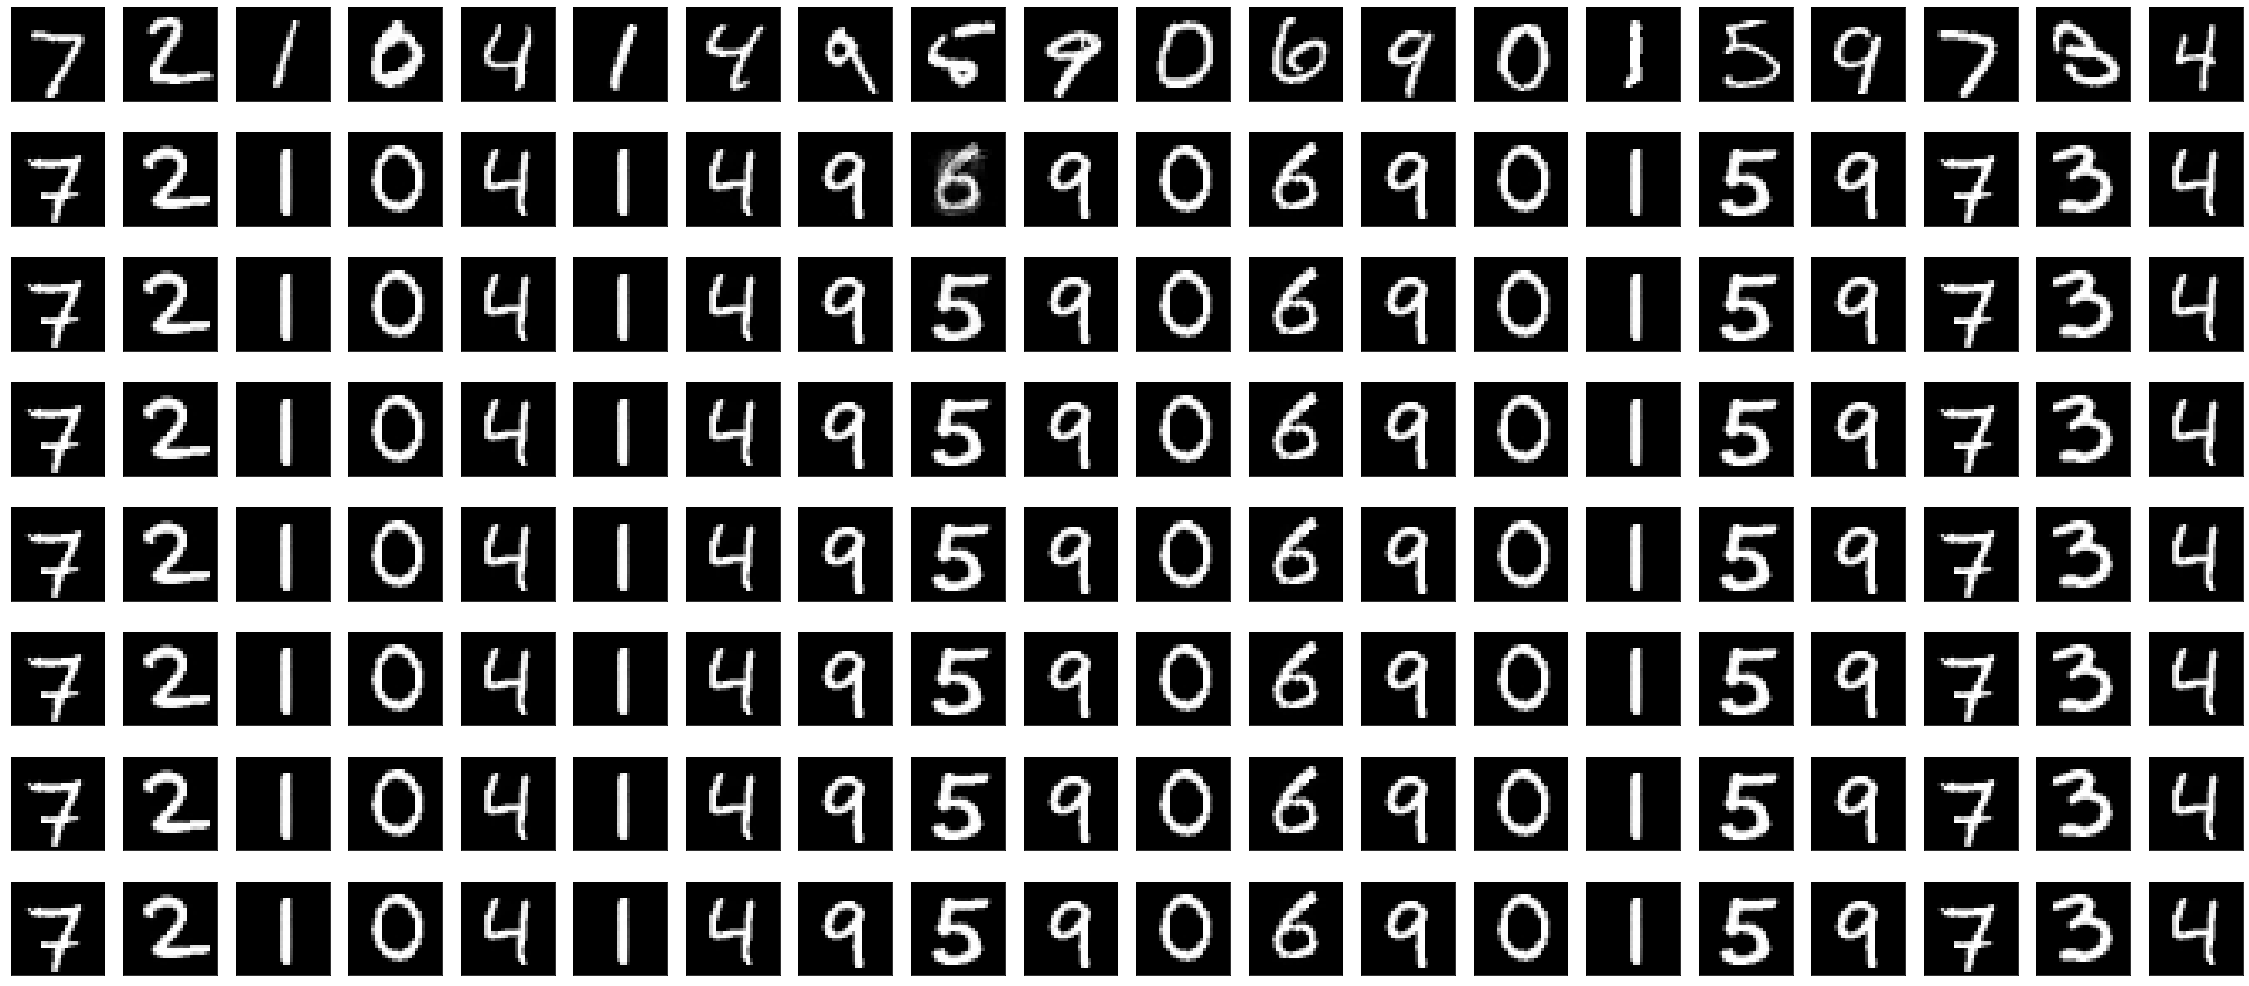

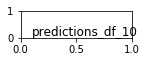

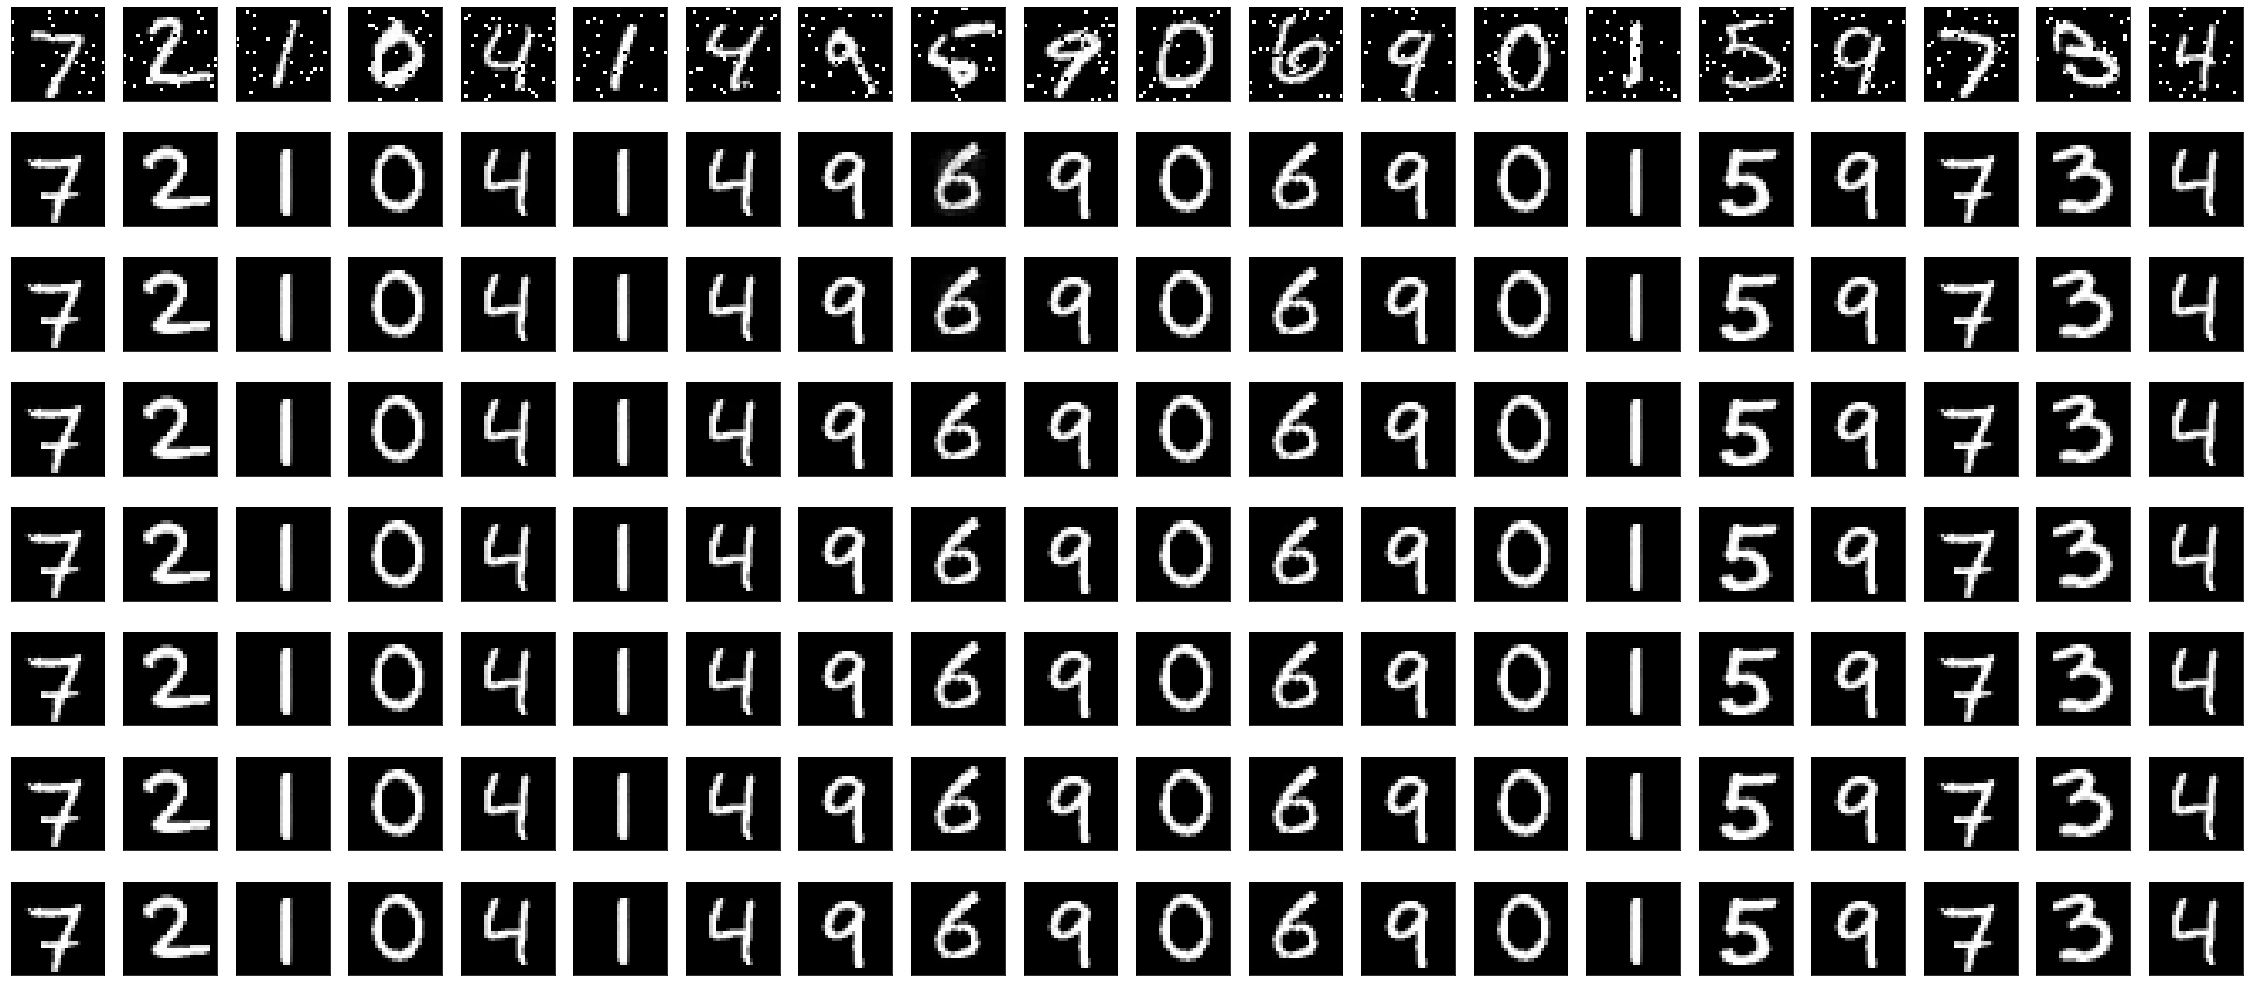

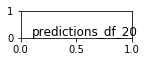

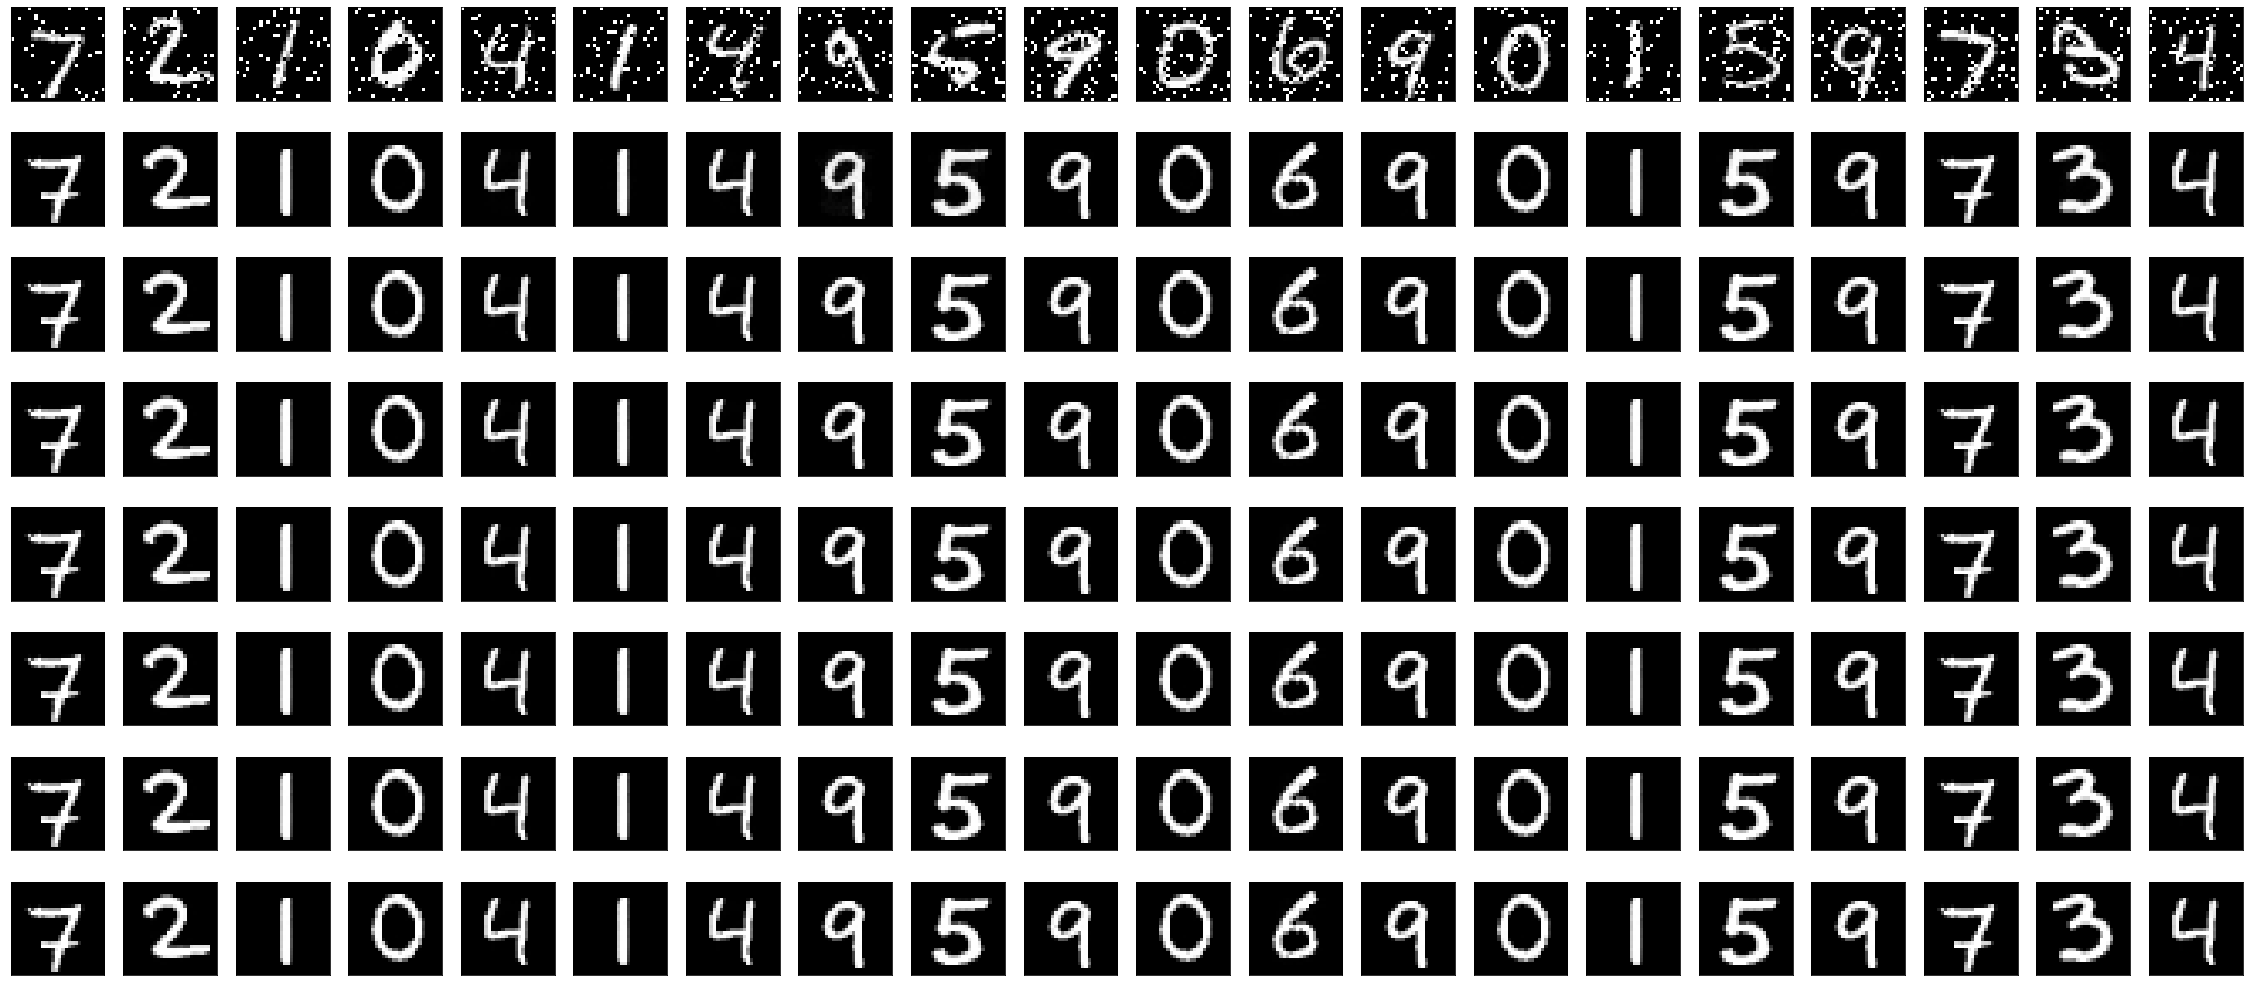

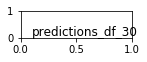

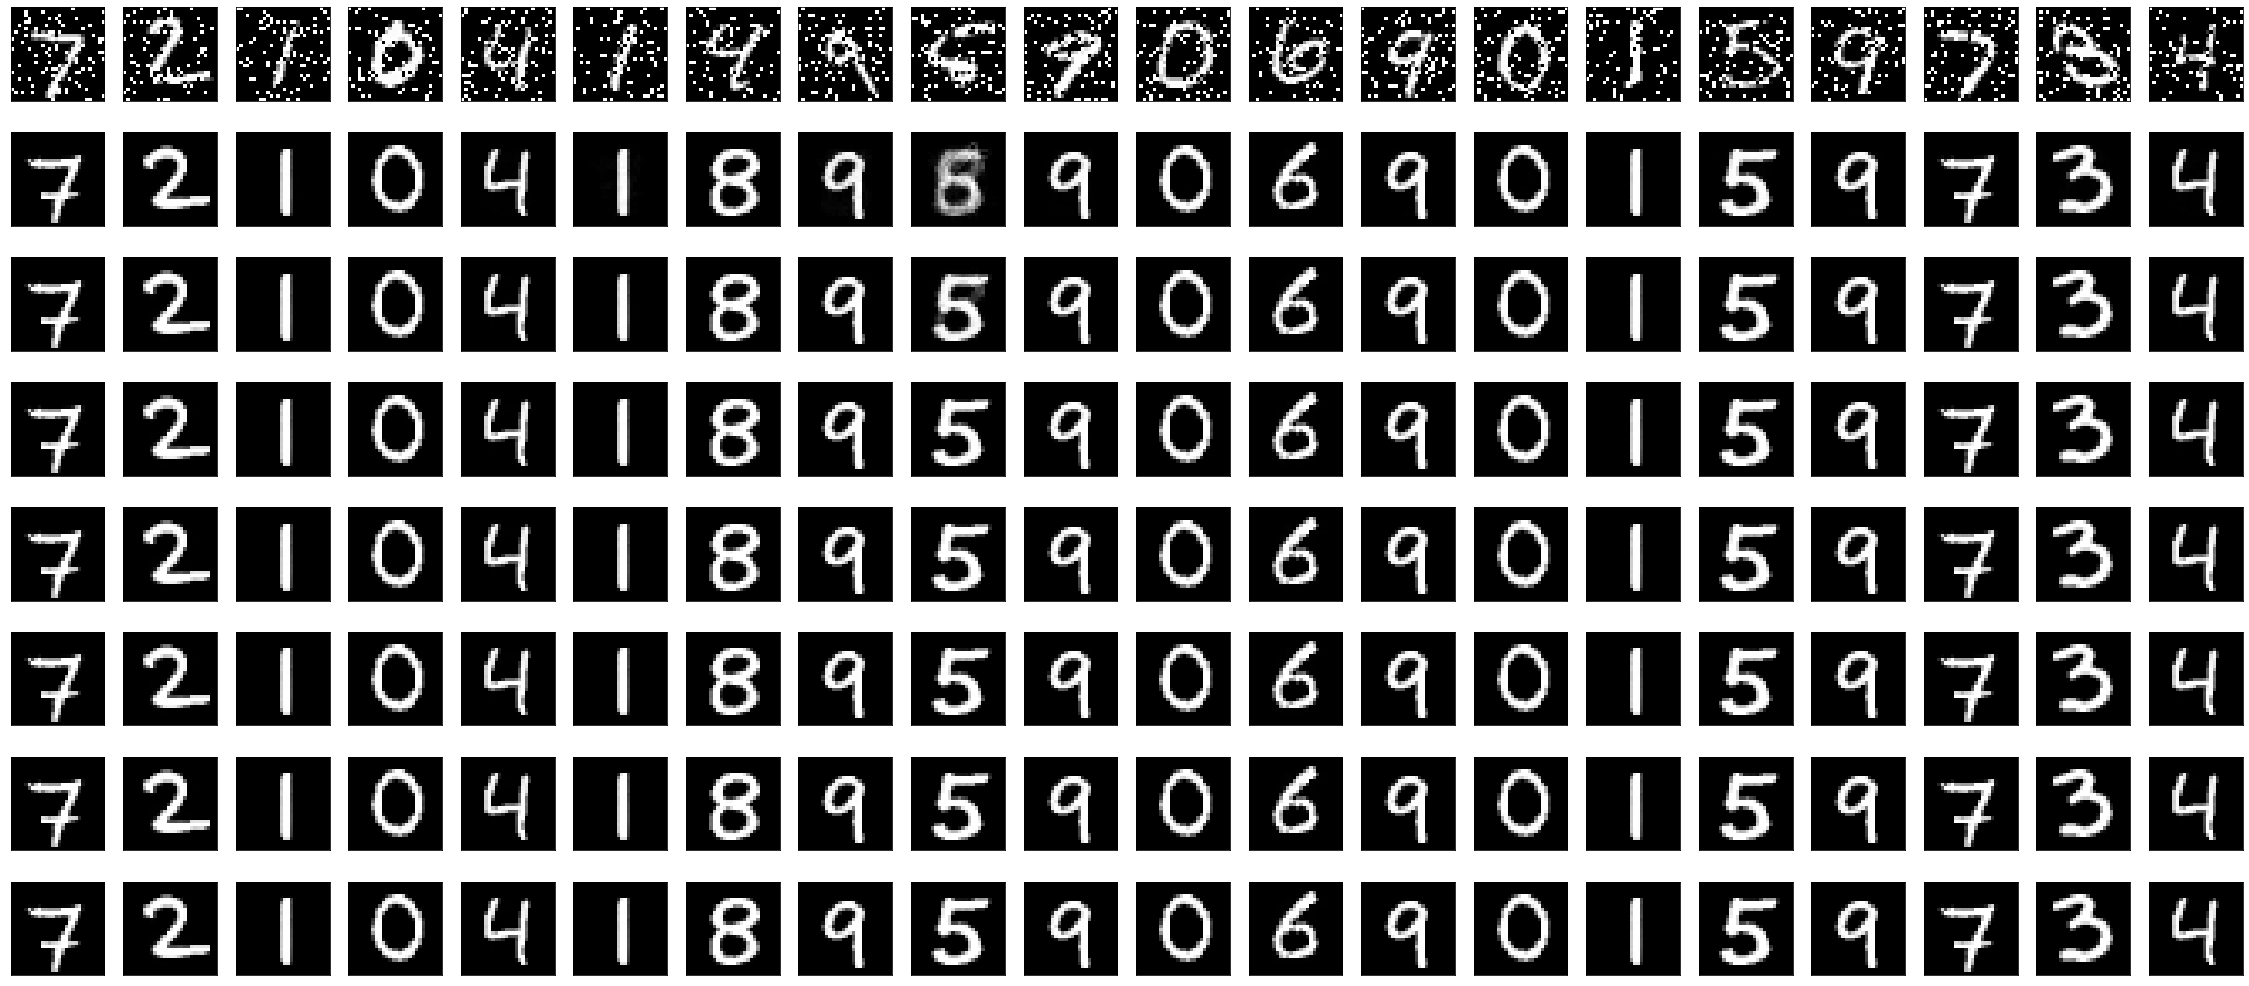

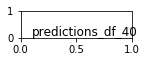

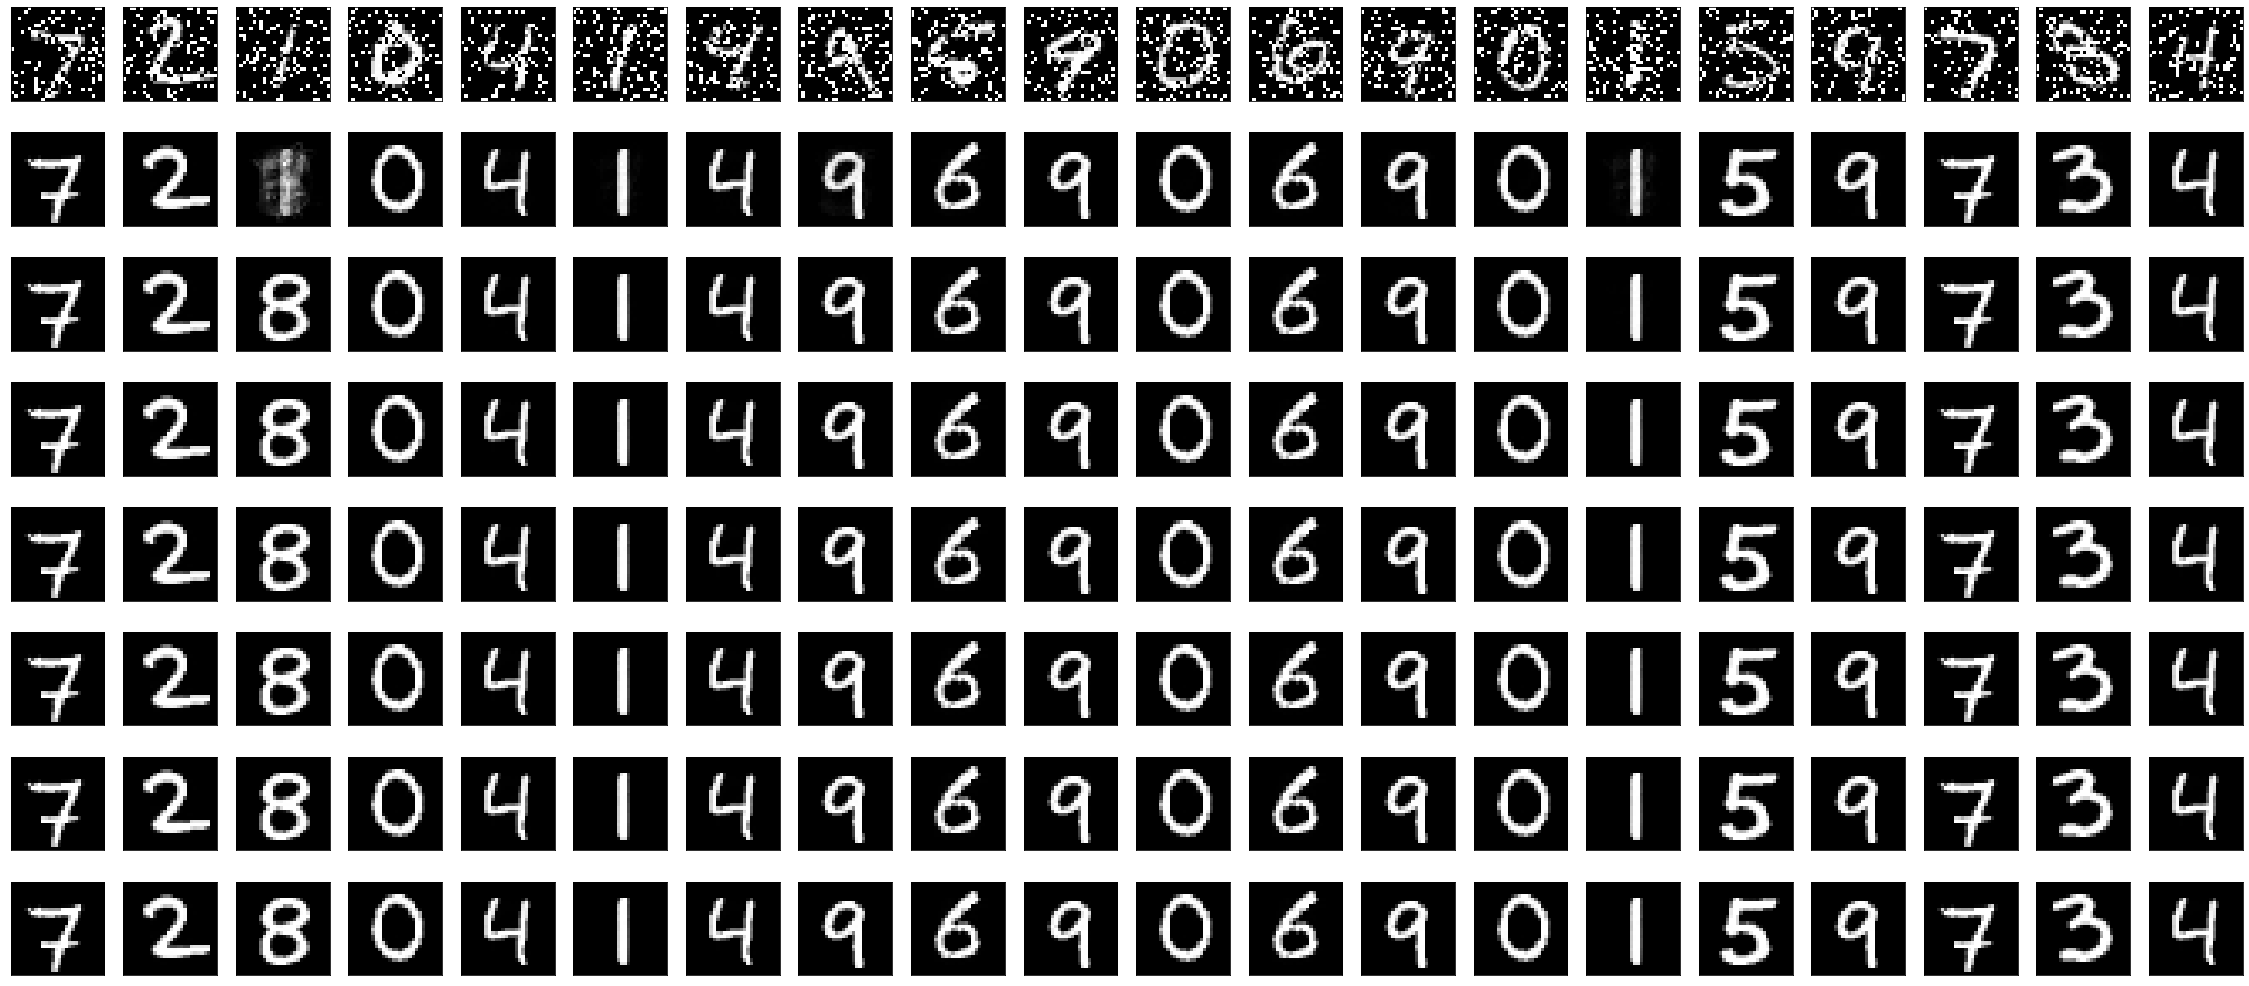

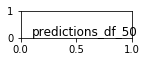

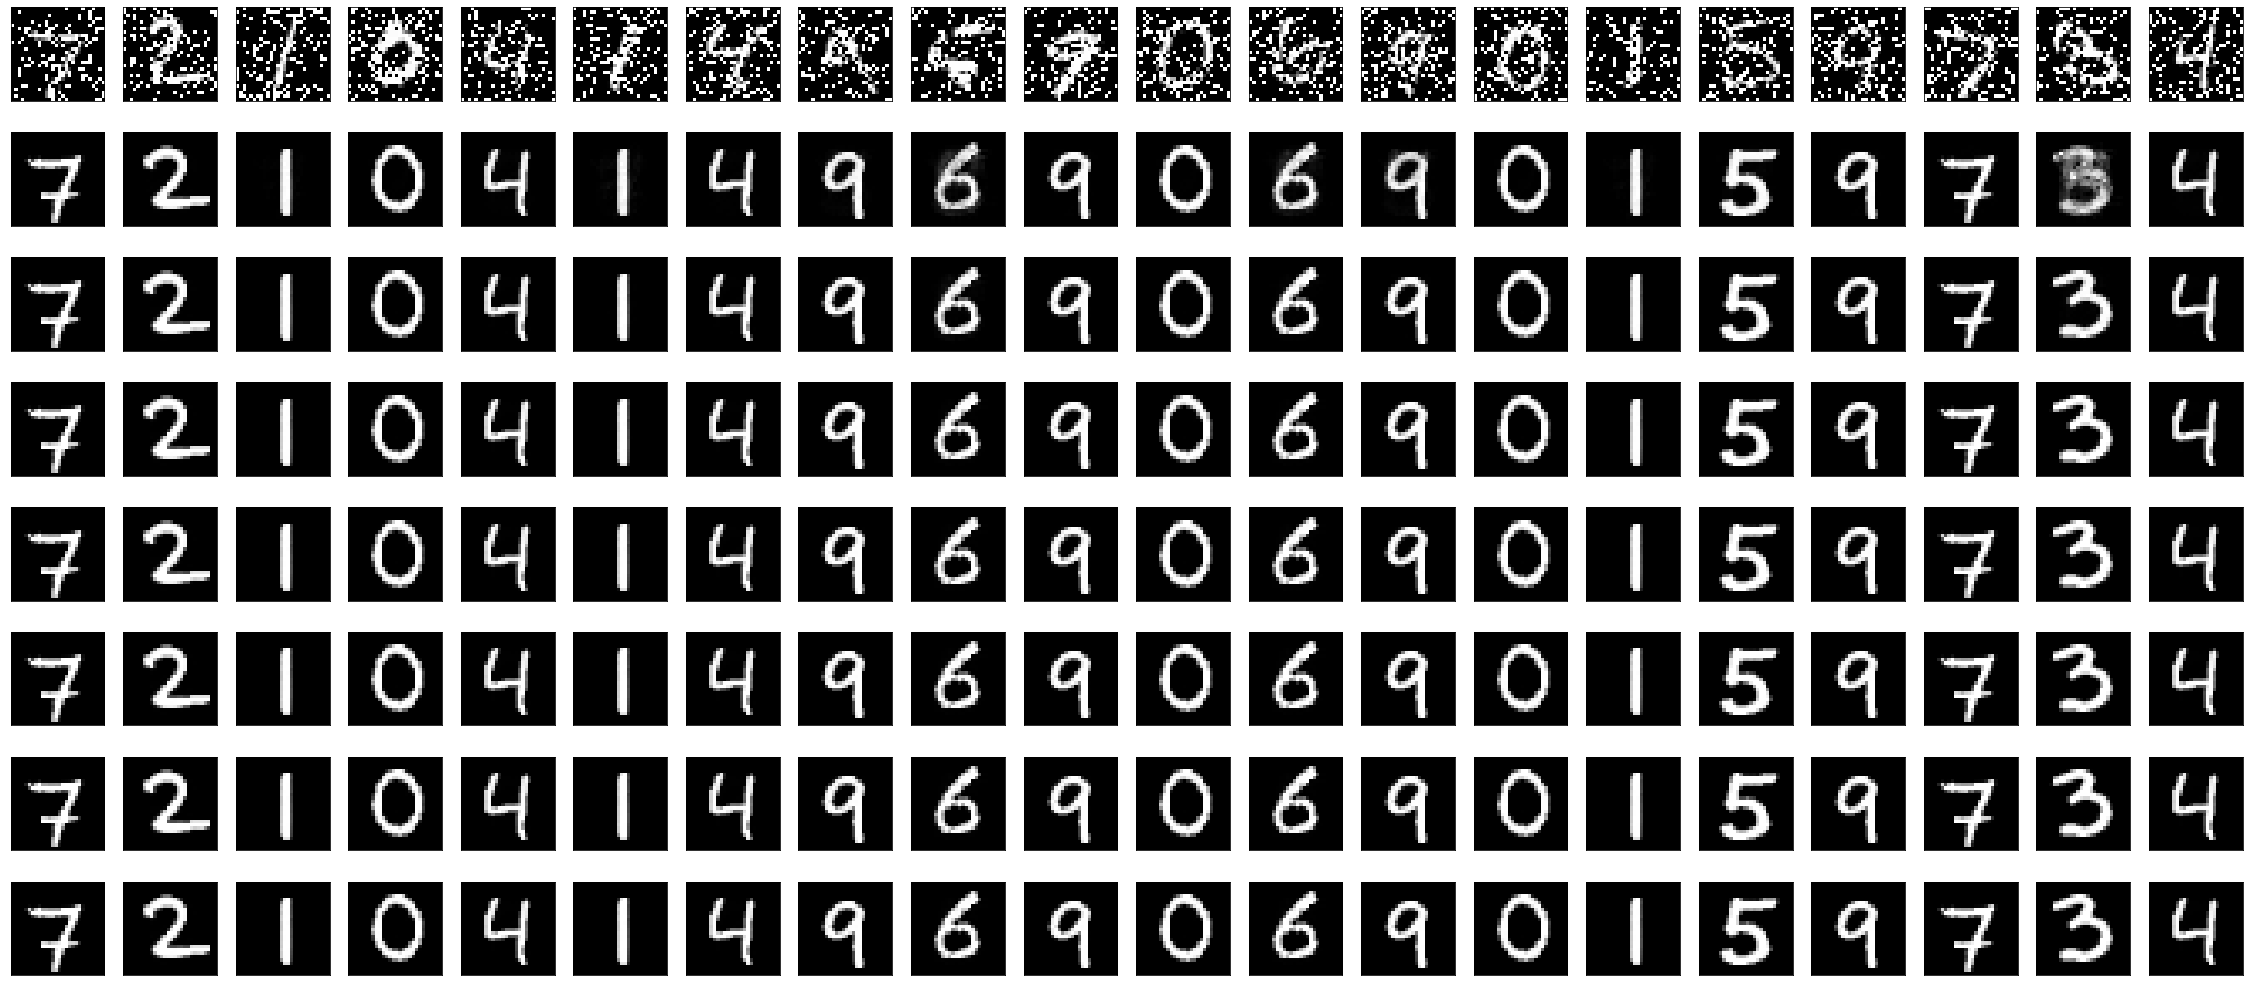

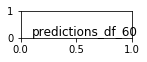

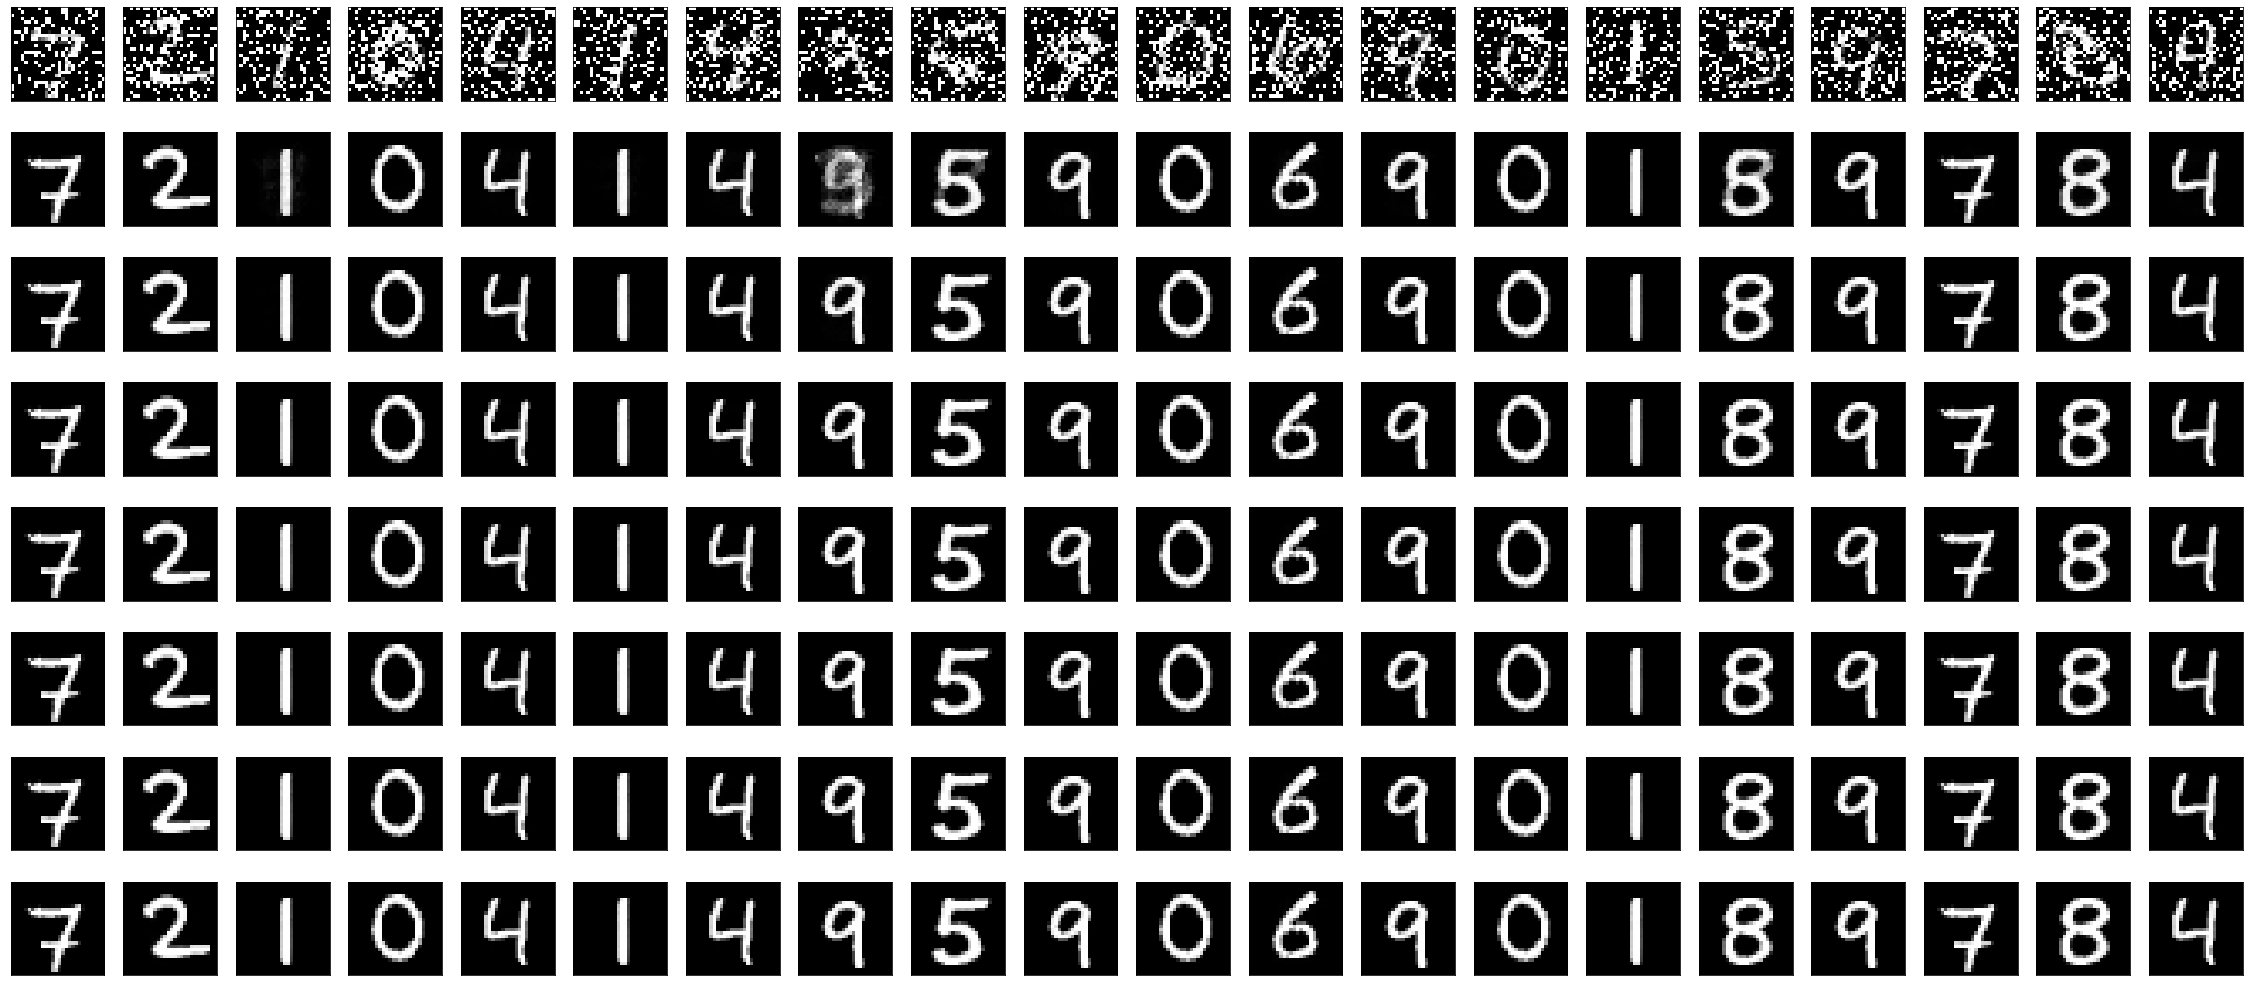

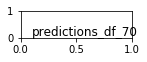

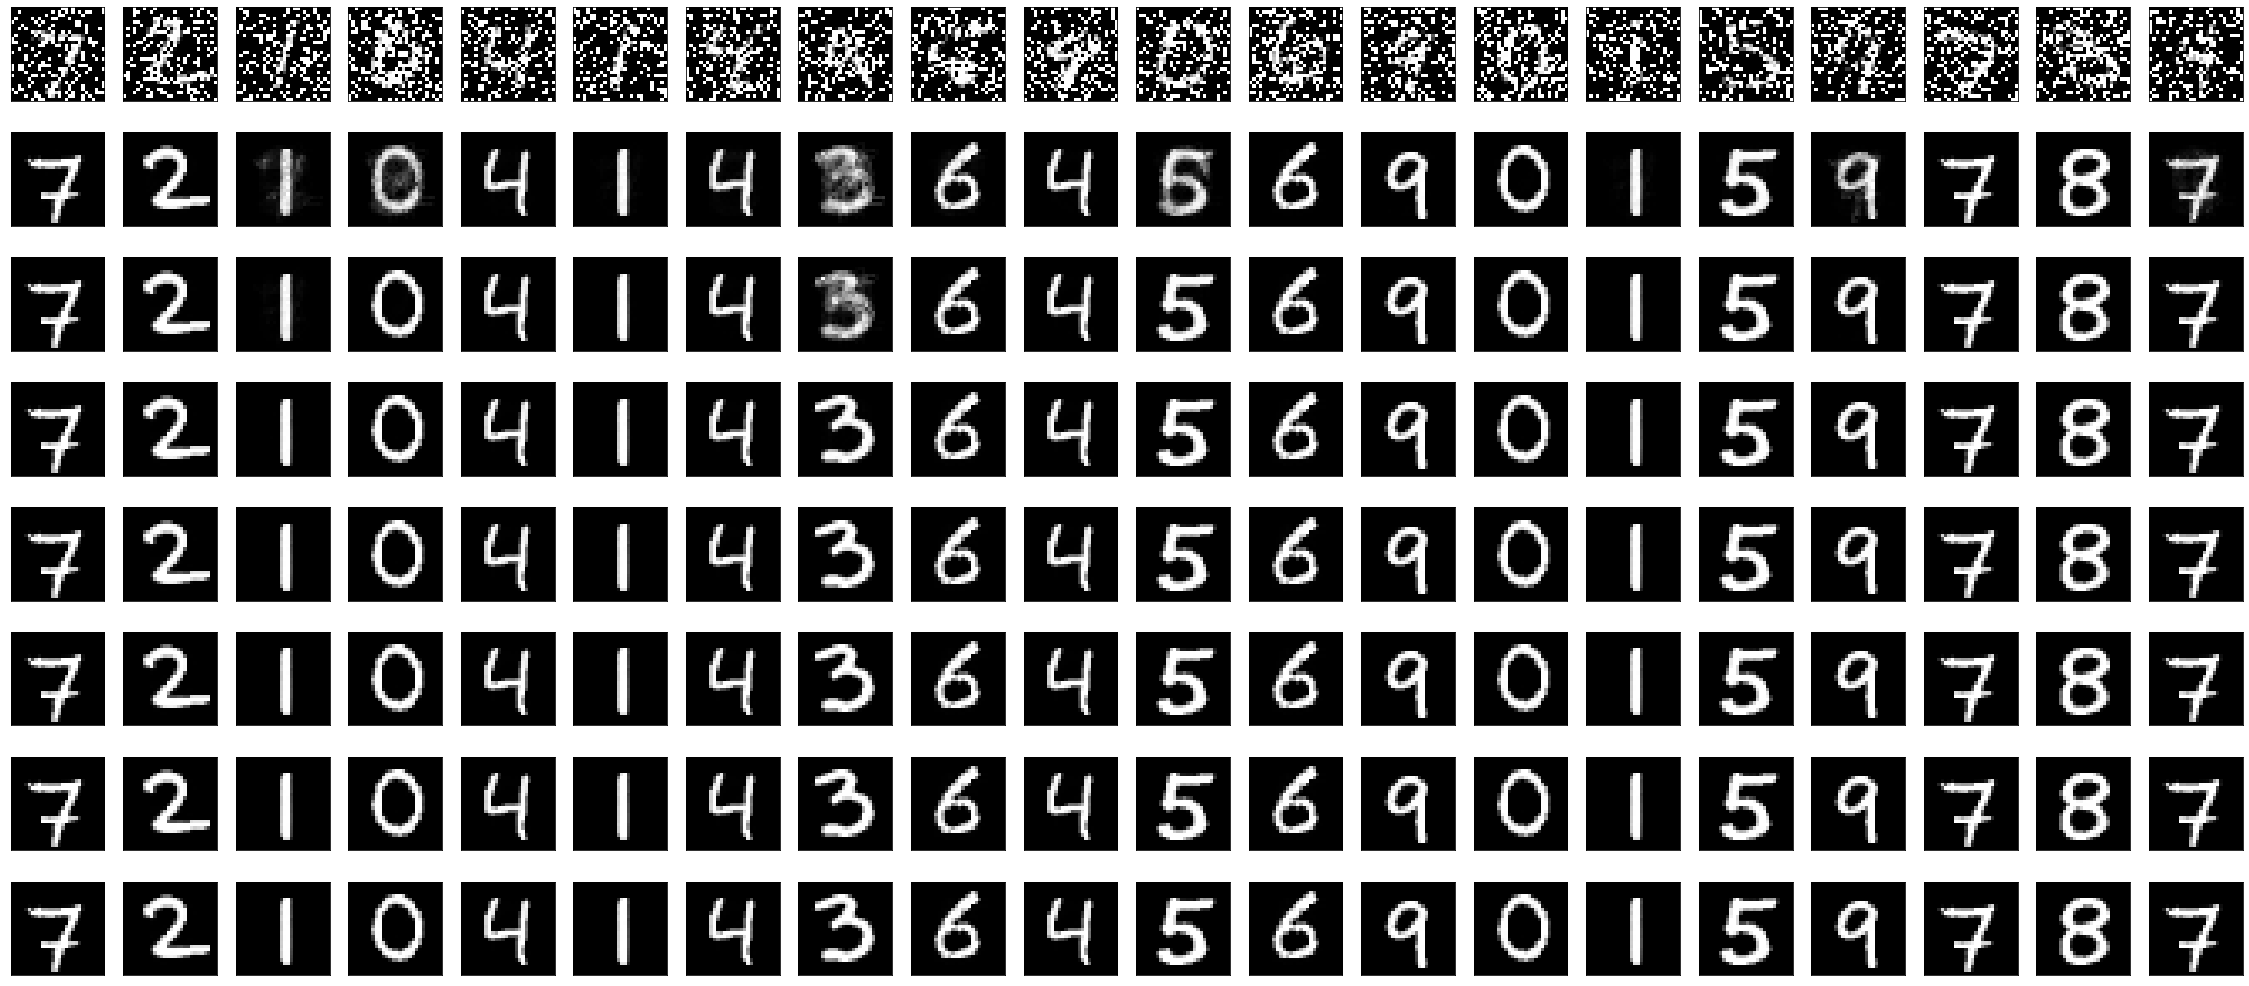

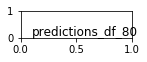

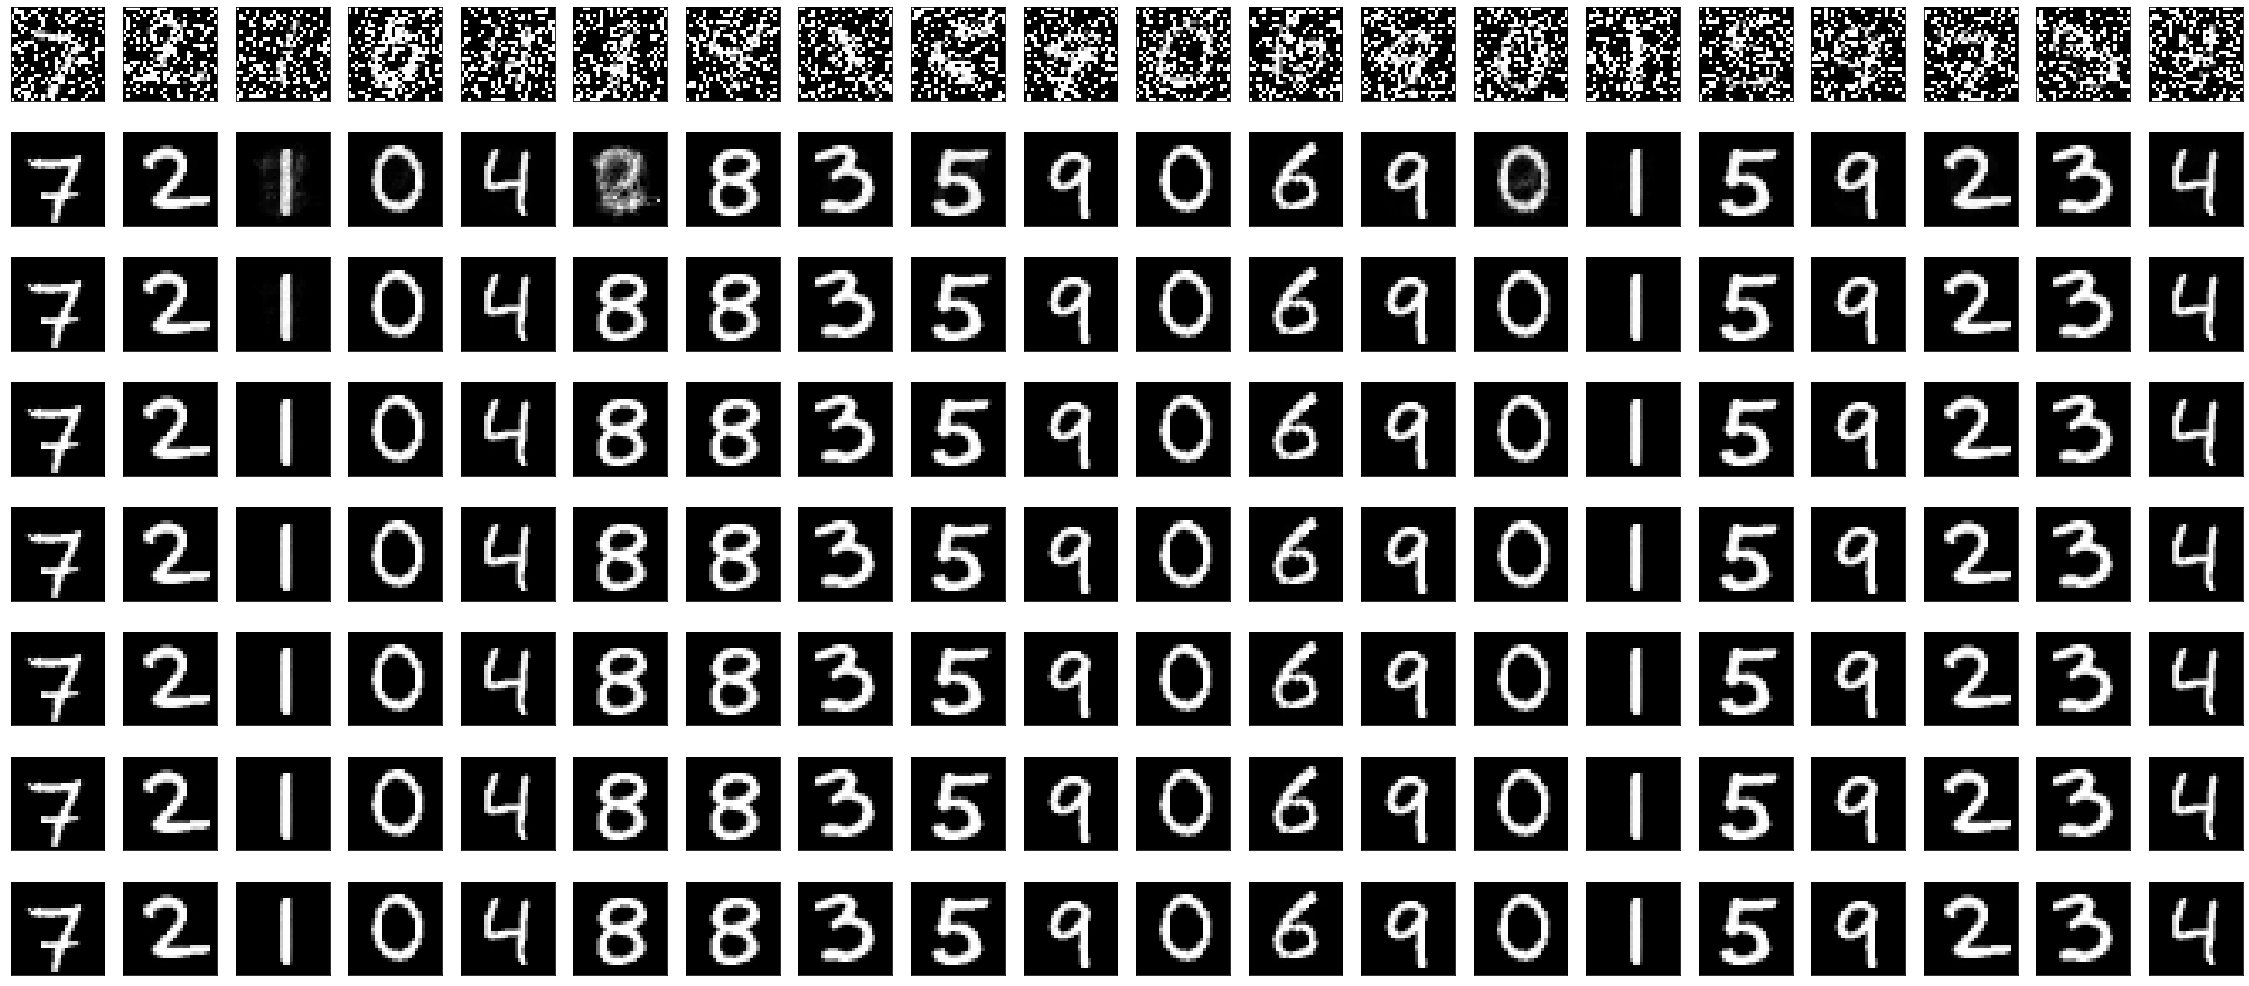

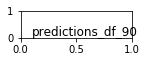

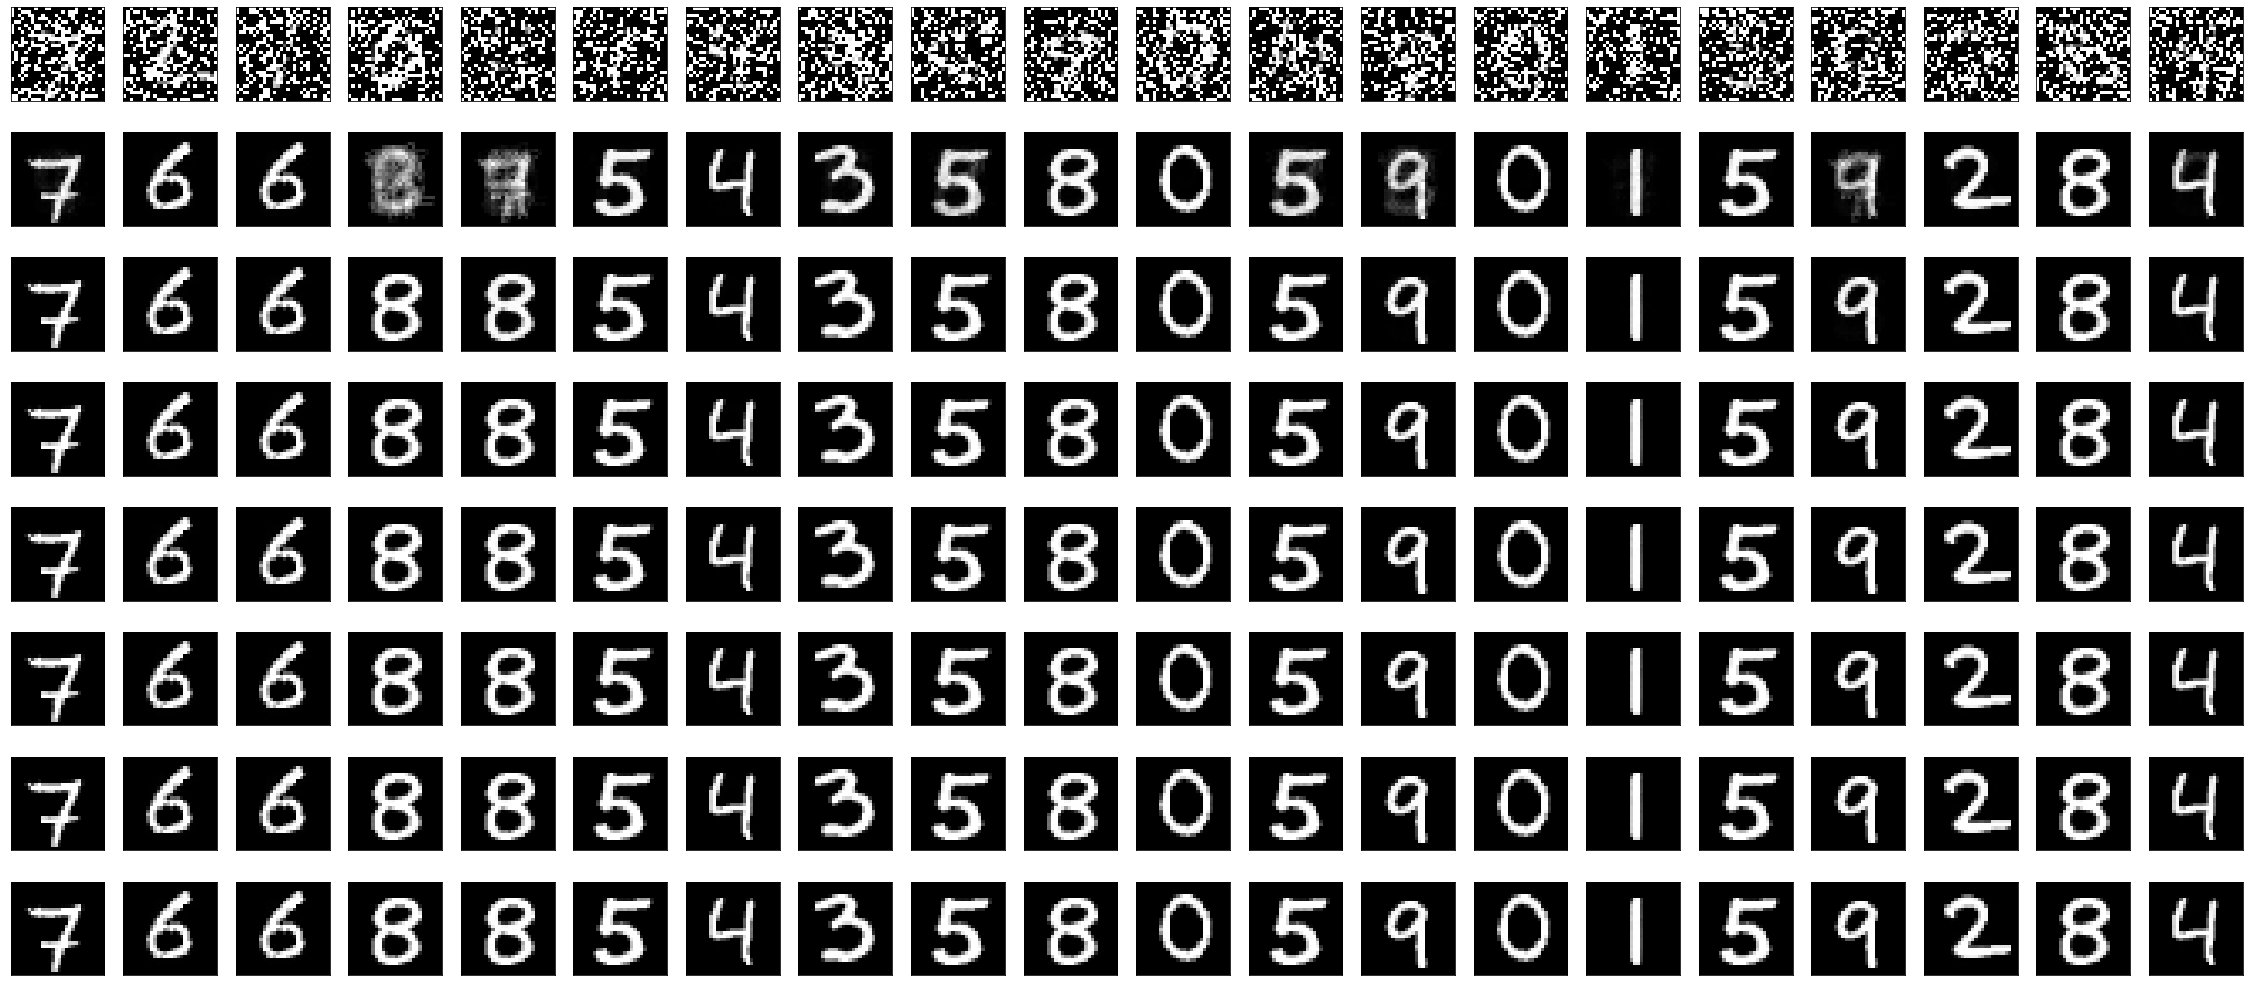

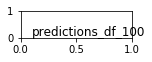

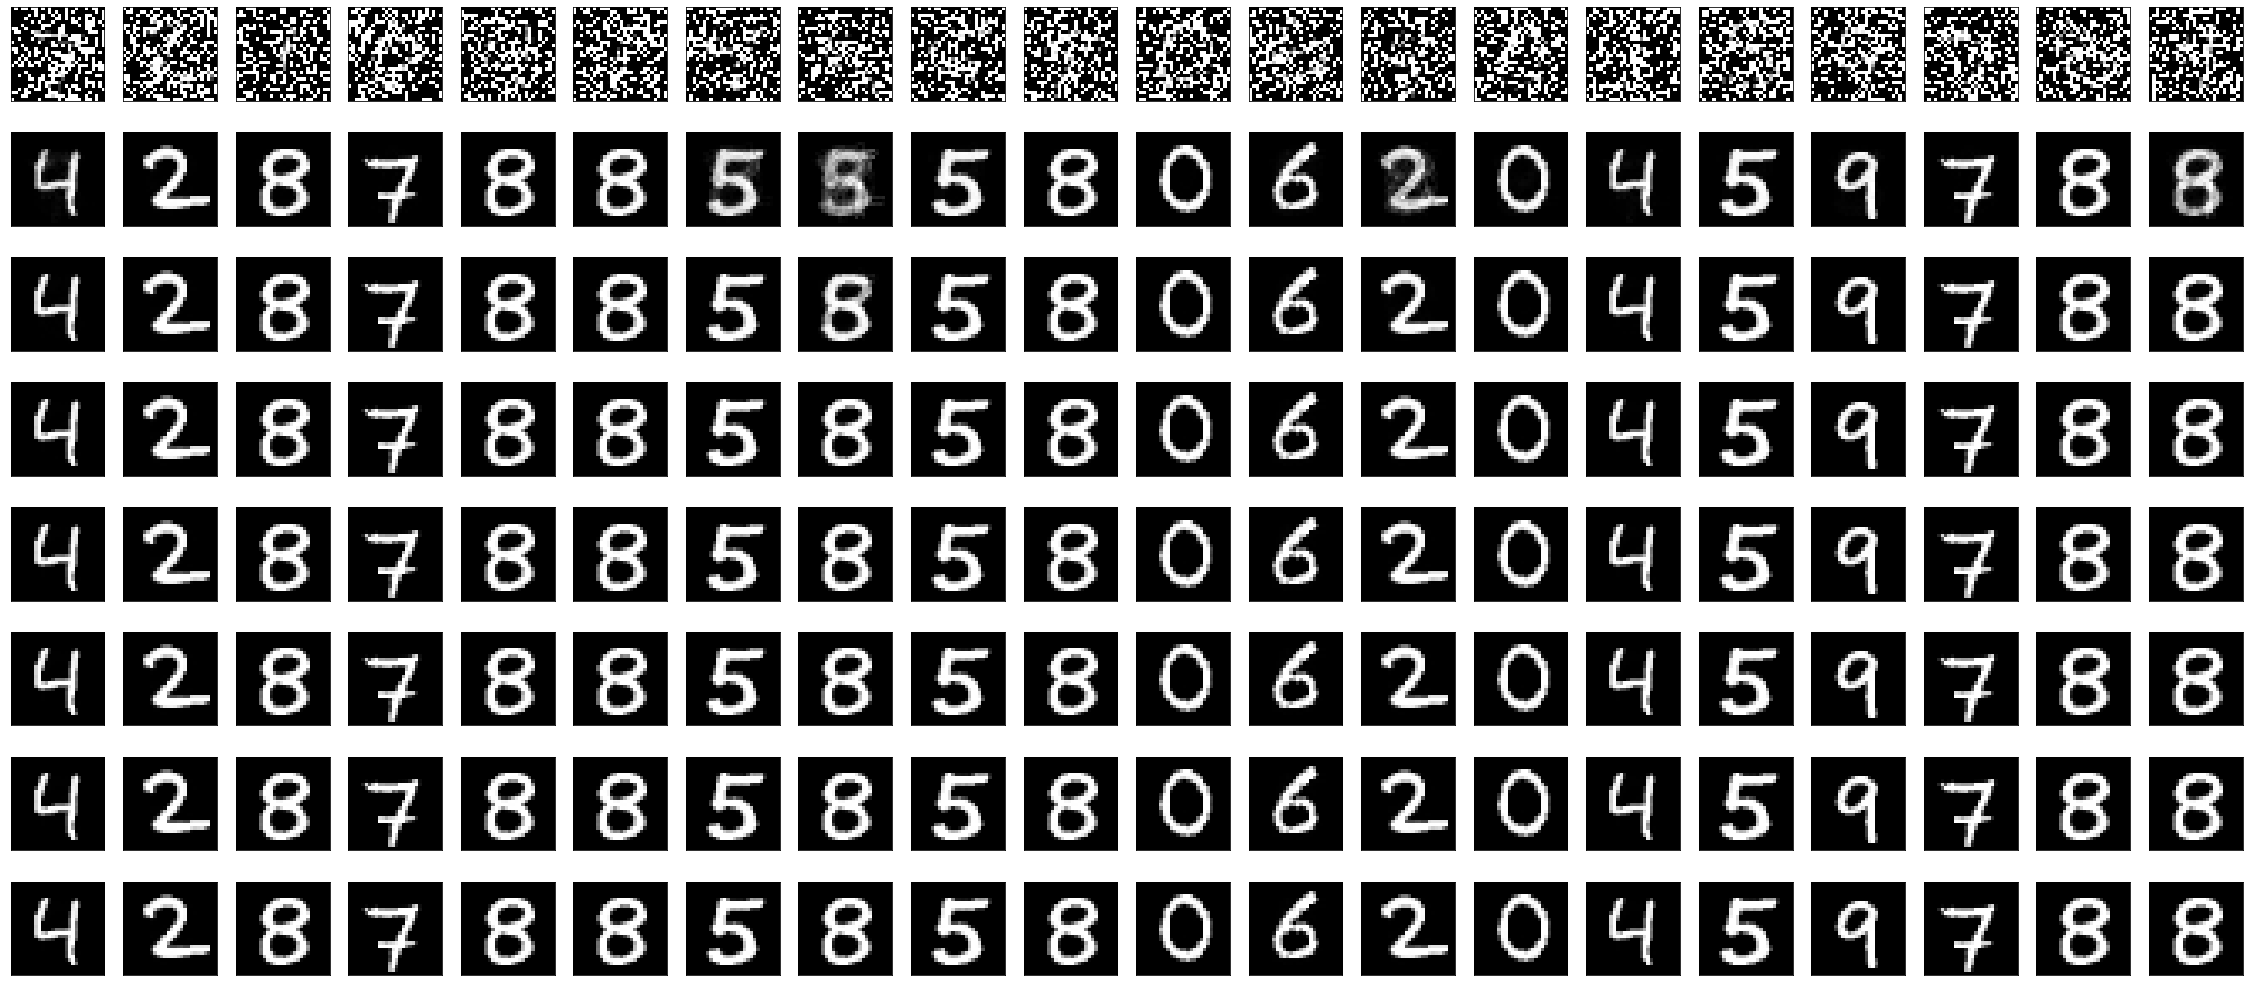

In [14]:
name_list=['predictions_df_0','predictions_df_10','predictions_df_20','predictions_df_30','predictions_df_40','predictions_df_50','predictions_df_60','predictions_df_70','predictions_df_80','predictions_df_90','predictions_df_100']
for name in name_list:
    pickle_artifact = exp.artifacts[name].as_type(incense.artifact.PickleArtifact)
    predictions_0=pd.read_pickle(pickle_artifact.file,compression='gzip')
    predictions_0=predictions_0['predictions']
    
    print_imm(predictions_0,name)

In [ ]:
stop ## automatic stopper 

In [ ]:
exp.artifacts['autoencoder.hdf5'].save()


In [ ]:
show_experiment(exp)

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers,regularizers
import csv
import pandas as pd 
from tensorflow.keras.utils import to_categorical



import matplotlib.pyplot as plt
tf.keras.backend.clear_session()  # For easy reset of notebook state.


In [ ]:
auto = keras.models.load_model('9_autoencoder.hdf5')


In [ ]:
data=np.load('../Cleaned_up/data.npz')



In [ ]:
signal_data = data['noisy_data']

In [ ]:
print_imm(signal_data,'signal data')

In [ ]:
predictions=[auto.predict(x) for x in signal_data]



In [ ]:
print_imm(predictions,'predictions')


